## Bibliotecas

In [4]:
!python --version


Python 3.12.7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os
from scipy.stats import ttest_ind

import polars as pl  
import json


%matplotlib inline
import scipy.stats as stats
import math

pl.Config.set_tbl_rows(50)  # Exibir até 100 linhas
pl.Config.set_tbl_cols(50)  # Exibir até 100 colunas

sns.set(rc={'figure.figsize':(12,8)})

base_path = os.path.join(os.getcwd(), "Data")

def cohens_d(controle, teste):
    n1, n2 = len(controle), len(teste)
    var1, var2 = np.var(controle, ddof=1), np.var(teste, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(teste) - np.mean(controle)) / pooled_std


import warnings
warnings.filterwarnings("ignore")

## Processamento e Visualização inicial das bases de dados

In [2]:
#
ab_test_ref = pl.read_csv(os.path.join(base_path, "ab_test_ref.csv"))
restaurant = pl.read_csv(os.path.join(base_path, "restaurant.csv"))


In [3]:
restaurant.head()

id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
str,str,bool,i64,f64,i64,i64,f64,i64,str,str,str
"""d19ff6fca6288939bff073ad0a119d…","""2017-01-23T12:52:30.910Z""",false,3,60.0,0,50,30.0,14025,"""RIBEIRAO PRETO""","""SP""","""BR"""
"""631df0985fdbbaf27b9b031a8f3819…","""2017-01-20T13:14:48.286Z""",true,3,60.0,0,0,30.0,50180,"""SAO PAULO""","""SP""","""BR"""
"""135c5c4ae4c1ec1fdc23e8c649f313…","""2017-01-23T12:46:33.457Z""",true,5,100.0,0,45,10.0,23090,"""RIO DE JANEIRO""","""RJ""","""BR"""
"""d26f84c470451f752bef036c55517b…","""2017-01-20T13:15:04.806Z""",true,3,80.0,0,0,18.9,40255,"""SALVADOR""","""BA""","""BR"""
"""97b9884600ea7192314580d9115f88…","""2017-01-20T13:14:27.701Z""",true,3,60.0,0,0,25.0,64600,"""BARUERI""","""SP""","""BR"""


In [4]:
restaurant['merchant_city'].value_counts().sort('count').tail(10)

merchant_city,count
str,u32
"""CAMPINAS""",142
"""RECIFE""",145
"""SALVADOR""",174
"""CURITIBA""",195
"""PORTO ALEGRE""",195
"""FORTALEZA""",200
"""BELO HORIZONTE""",337
"""BRASILIA""",372
"""RIO DE JANEIRO""",944


In [5]:
ab_test_ref['is_target'].value_counts()

is_target,count
str,u32
"""control""",360542
"""target""",445925


In [6]:
consumer_pandas = pd.read_csv(os.path.join(base_path, "consumer.csv")) #pd.read_csv('C:/Users/Leonardo/Downloads/Case iFood/Data/consumer.csv')
#base não estava sendo reconhecida diretamente pelo polars
#a solução foi importar através do pandas e converter em polars

consumer = pl.from_pandas(consumer_pandas).with_columns(
    pl.col("created_at").str.strptime(pl.Datetime(time_unit="ms"),
                                      format="%Y-%m-%dT%H:%M:%S%.fZ").alias("created_at"))
consumer.head()

customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number
str,str,datetime[ms],bool,str,i64,i64
"""e8cc60860e09c0bb19610b06ced69c…","""pt-br""",2018-04-05 14:49:18.165,true,"""NUNO""",46,816135924
"""a2834a38a9876cf74e016524dd2e8c…","""pt-br""",2018-01-14 21:40:02.141,true,"""ADRIELLY""",59,231330577
"""41e1051728eba13341136d67d0757f…","""pt-br""",2018-01-07 03:47:15.554,true,"""PAULA""",62,347597883
"""8e7c1dcb64edf95c935147f6d560cb…","""pt-br""",2018-01-10 22:17:08.160,true,"""HELTON""",13,719366842
"""7823d4cf4150c5daeae0bd79920685…","""pt-br""",2018-04-06 00:16:20.935,true,"""WENDER""",76,543232158


In [7]:
json_path = (os.path.join (base_path, "order.json"))

In [8]:
#para facilitar a leitura da base, a mesma será convertida em parquet antes da leitura 
pl.read_ndjson(json_path).write_parquet('order.parquet')

In [9]:
df = pl.read_parquet("order.parquet").with_columns(
    pl.col("order_created_at").str.strptime(pl.Datetime(time_unit="ms"), format="%Y-%m-%dT%H:%M:%S%.fZ").alias("order_created_at"))


In [10]:
df.head()

cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],str,bool,f64,str
"""80532101763""","""7ba88a68bb2a3504c6bd37a707af57…","""GUSTAVO""","""FRANCA""","""BR""","""JARDIM ESPRAIADO""","""6736655""","""-47.39""","""-20.55""","""SP""","""14403""","""[{""name"": ""Parmegiana de Filé …","""a992a079a651e699d9149423761df2…","""-47.39""","""-20.55""","""America/Sao_Paulo""",2019-01-17 22:50:06,"""33e0612d62e5eb42aba15b58413137…",false,46.0,"""ANDROID"""
"""43352103961""","""078acecdcf7fa89d356bfa349f14a8…","""MICHELLE""","""SANTOS""","""BR""","""CAMPO GRANDE""","""8759216""","""-46.34""","""-23.96""","""SP""","""11070""","""[{""name"": ""Filé Mignon à Cuban…","""5152f28ee0518b8803ccf0a4096eb2…","""-46.34""","""-23.96""","""America/Sao_Paulo""",2019-01-17 17:51:26,"""148c4353a2952f3fe7973547283265…",false,104.5,"""ANDROID"""
"""38650991217""","""0e38a3237b5946e8ab2367b4f1a3ae…","""VICTOR""","""GUARULHOS""","""BR""","""JARDIM ROSSI""","""8765930""","""-46.53""","""-23.44""","""SP""","""71304""","""[{""name"": ""GRANDE 2 SABORES"", …","""b6096419455c35d06105a5ef0d25c5…","""-46.53""","""-23.44""","""America/Sao_Paulo""",2019-01-17 22:53:47,"""c37e495a91b498bb7b70a9e09ac115…",false,35.0,"""IOS"""
"""63579726866""","""cab1a004b7206d07910092c515a798…","""ANNIE""","""SAO PAULO""","""BR""","""PARQUE SAO JORGE""","""7834087""","""-46.57""","""-23.53""","""SP""","""30870""","""[{""name"": ""CALABRESA"", ""additi…","""082bfdcdf6ccdc343e3c4d25ee376b…","""-46.57""","""-23.53""","""America/Sao_Paulo""",2019-01-17 23:56:53,"""b4df94142d21354611247da9ca94f8…",false,40.8,"""IOS"""
"""90617788806""","""aa7edf5b166b8c843aec3b96dc5612…","""DANIEL""","""VITORIA""","""BR""","""JARDIM CAMBURI""","""7211683""","""-40.27""","""-20.25""","""ES""","""29090""","""[{""name"": ""GRANDE (35CM) 8 PDÇ…","""d7adb764bac29ccb77fb8f746ffbd5…","""-40.27""","""-20.25""","""America/Sao_Paulo""",2019-01-17 23:40:53,"""4ff64b33b272c1886df21b63272220…",false,48.5,"""ANDROID"""


In [11]:
#checando quantidade de registro para pedidos
df[['order_id']].count()

order_id
u32
3670826


In [12]:
#checando a quantidade de pedidos distintos
df[['order_id']].n_unique()

2432974

## ETL

In [13]:
filter_order = df['order_id'].value_counts()
orderslist = filter_order.filter(pl.col('count')>1)['order_id'].to_list()
filtered_df = df.filter(pl.col('order_id').is_in(orderslist))
filtered_df.sort('order_id').head()

cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],str,bool,f64,str
"""11617322723""","""4a5eac97fcc0d807305a0dc12bcd77…","""LÍV""","""SAO JOSE DOS CAMPOS""","""BR""","""JARDIM PAULISTA""","""5703370""","""-45.87""","""-23.19""","""SP""","""12215""","""[{""name"": ""Combo 2"", ""addition…","""1a6dfd9abd3bdf47de965edfd19e26…","""-45.87""","""-23.19""","""America/Sao_Paulo""",2019-01-05 23:56:47,"""00000b67fac8e2e295f9d9ae7ccb44…",false,35.9,"""ANDROID"""
"""09998377521""","""4a5eac97fcc0d807305a0dc12bcd77…","""LÍV""","""SAO JOSE DOS CAMPOS""","""BR""","""JARDIM PAULISTA""","""5703370""","""-45.87""","""-23.19""","""SP""","""12215""","""[{""name"": ""Combo 2"", ""addition…","""1a6dfd9abd3bdf47de965edfd19e26…","""-45.87""","""-23.19""","""America/Sao_Paulo""",2018-12-06 23:56:47,"""00000b67fac8e2e295f9d9ae7ccb44…",false,35.9,"""ANDROID"""
"""48407845939""","""c1c7126ad0d6ca68eaf2e57d814154…","""ANA""","""BELO HORIZONTE""","""BR""","""NOVA SUISSA""","""9023992""","""-43.98""","""-19.93""","""MG""","""30421""","""[{""name"": ""Lombo à Mineira"", ""…","""9b9a1db6774b8d49df797e6589a626…","""-43.98""","""-19.93""","""America/Sao_Paulo""",2019-01-25 00:33:14,"""00000fa3ee5165ced42ab24200fa71…",false,25.42,"""IOS"""
"""00939442255""","""c1c7126ad0d6ca68eaf2e57d814154…","""ANA""","""BELO HORIZONTE""","""BR""","""NOVA SUISSA""","""9023992""","""-43.98""","""-19.93""","""MG""","""30421""","""[{""name"": ""Lombo à Mineira"", ""…","""9b9a1db6774b8d49df797e6589a626…","""-43.98""","""-19.93""","""America/Sao_Paulo""",2018-12-26 00:33:14,"""00000fa3ee5165ced42ab24200fa71…",false,25.42,"""IOS"""
"""77024981760""","""daa25fa7b34ed201fc3367c9eb77e2…","""THAMIRES""","""SAO JOSE""","""BR""","""FORQUILHINHAS""","""8796131""","""-48.64""","""-27.59""","""SC""","""88106""","""[{""name"": ""Bife Bovino à Parme…","""dcb6dcdf1629fffabb34ecf57a885e…","""-48.64""","""-27.59""","""America/Sao_Paulo""",2019-01-23 23:30:01,"""0000226b0983a454ebe2bb26c853f7…",false,37.5,"""ANDROID"""


In [14]:
filtered_df.group_by("order_id").agg(
    [
        pl.col(col).n_unique().alias(f"distinct_{col}")  
        for col in df.columns  
        if col != "order_id" 
    ]
).describe()

#as colunas cpf e order_created_at são as únicas que não se repetem 

statistic,order_id,distinct_cpf,distinct_customer_id,distinct_customer_name,distinct_delivery_address_city,distinct_delivery_address_country,distinct_delivery_address_district,distinct_delivery_address_external_id,distinct_delivery_address_latitude,distinct_delivery_address_longitude,distinct_delivery_address_state,distinct_delivery_address_zip_code,distinct_items,distinct_merchant_id,distinct_merchant_latitude,distinct_merchant_longitude,distinct_merchant_timezone,distinct_order_created_at,distinct_order_scheduled,distinct_order_total_amount,distinct_origin_platform
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""1237852""",1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6,1.237852e6
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
"""std""",null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""min""","""00000b67fac8e2e295f9d9ae7ccb44…",2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
"""25%""",null,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
"""50%""",null,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
"""75%""",null,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
"""max""","""ffffd1b19ed134e9be22fb6c77ffb4…",2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [15]:
#vamos investigar o que acontece para order_created_at possuir dois valores distintos
filtered_df = filtered_df.sort(["order_id", "order_created_at"]).with_columns(
    (pl.col("order_created_at") - pl.col("order_created_at").shift(1).over("order_id")).alias("time_diff")
)
filtered_df['time_diff'].describe()
#describe em time_diff para entender se existe um padrão.

statistic,value
str,str
"""count""","""1237852"""
"""null_count""","""1237852"""
"""mean""","""30 days, 0:00:00"""
"""min""","""30 days, 0:00:00"""
"""25%""","""30 days, 0:00:00"""
"""50%""","""30 days, 0:00:00"""
"""75%""","""30 days, 0:00:00"""
"""max""","""30 days, 0:00:00"""


In [16]:
#todos os pedidos são "refeitos" 30 dias depois
##por conta disso vamos considerar sempre o pedido criado primeiro.
df_cleaned = df.drop("cpf").group_by("order_id").agg(
    pl.all().sort_by("order_created_at").first()
)

In [17]:
df_cleaned['order_id'].count()

2432974

In [18]:
df_cleaned['order_id'].n_unique()

2432974

In [19]:
# Unir a tabela tratada a relação de usuarios do teste ab
df1 = df_cleaned.join(ab_test_ref, on='customer_id', how='left')

# Colunas de tempo
df1 = df1.with_columns(
#dia
    pl.col("order_created_at").dt.date().alias("date"),
#mes
    (
        pl.col("order_created_at").dt.year().cast(pl.Utf8) + "-" + pl.col("order_created_at").dt.month().cast(pl.Utf8).str.zfill(2) 
    ).alias("year_month"),
#semana
    (
        (pl.col("order_created_at").dt.date() - pl.duration(days=(pl.col("order_created_at").dt.weekday() - 1) % 7))
    ).alias("year_week")
)

# Exibir as primeiras linhas
df1.head()

order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],bool,f64,str,str,date,str,date
"""3ef963be2ac7a5260d7182e52e481a…","""de9ca4054e41e0de1805d5200598a7…","""CAMILA""","""SAO PAULO""","""BR""","""JARDIM PAULISTA""","""9027854""","""-46.65""","""-23.57""","""SP""","""14020""","""[{""name"": ""GRANDE 2 SABORES"", …","""68b72c264dc0ca7571200ccdfe1b5b…","""-46.65""","""-23.57""","""America/Sao_Paulo""",2018-12-10 23:27:43,false,55.0,"""ANDROID""","""target""",2018-12-10,"""2018-12""",2018-12-10
"""95870659f821e714418f1d49ebb295…","""fc98dfbc5a78c91080fd6597aea796…","""LUIZA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9084537""","""-43.22""","""-22.98""","""RJ""","""22441""","""[{""name"": ""GIGA"", ""addition"": …","""7471334c70f19a4abc75713862bb42…","""-43.22""","""-22.98""","""America/Sao_Paulo""",2018-12-31 00:56:44,false,102.8,"""IOS""","""target""",2018-12-31,"""2018-12""",2018-12-31
"""f6364616c31476f181d8a53993e0f7…","""9ed8f6f184b20458ef62e4435d7a53…","""LUCIANA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9459967""","""-43.22""","""-22.99""","""RJ""","""22441""","""[{""name"": ""Pacote de Pão Árabe…","""f5b685fda71643a4b5a29201c9fda1…","""-43.22""","""-22.99""","""America/Sao_Paulo""",2018-12-25 23:00:51,false,280.0,"""IOS""","""target""",2018-12-25,"""2018-12""",2018-12-24
"""2979ba65e67aacffc2cdaee2993413…","""d9fa6d240fbcc4acb1d51d3c5c00b5…","""PHELIPE""","""JUIZ DE FORA""","""BR""","""CENTRO""","""8975998""","""-43.34""","""-21.77""","""MG""","""36010""","""[{""name"": ""GIGA 2 SABORES"", ""a…","""ff9049ae95bf47cc87642c6a2eddf9…","""-43.34""","""-21.77""","""America/Sao_Paulo""",2018-12-29 22:25:29,false,52.9,"""ANDROID""","""target""",2018-12-29,"""2018-12""",2018-12-24
"""037e2426a20e51da7076abf42b4ad1…","""f8f4b03492411da34db798ebe0efea…","""RODRIGO""","""VITORIA""","""BR""","""JARDIM DA PENHA""","""6424274""","""-40.29""","""-20.29""","""ES""","""29060""","""[{""name"": ""03 - Cheese Egg Bur…","""b0bdf3fd0af7e0536f32403c2700df…","""-40.29""","""-20.29""","""America/Sao_Paulo""",2019-01-29 23:40:44,false,14.5,"""ANDROID""","""control""",2019-01-29,"""2019-01""",2019-01-28


In [20]:
#Para análise de viabilidade financeira

#Aplicando a lógica de cupons mais comum de nos dias de hoje pelo ifood  25% até R$10
#Taxa de 12% considerando que as lojas sejam do plano básico do ifood 

df1 = df1.with_columns(
    # Desconto de 25% até R$ 10,00. Atual Cenário
    pl.when(pl.col("is_target") == "target") 
    .then(
        pl.when(pl.col("order_total_amount") * 0.25 <= 10)  # Se 25% do valor do pedido for menor ou igual a R$ 10,00
        .then(pl.col("order_total_amount") * 0.25)  # Aplicar 25% de desconto
        .otherwise(10)  # Caso contrário, aplicar desconto máximo de R$ 10,00
    )
    .otherwise(0) 
    .alias("discount"), 

    # Desconto R$ 10,00 para pedidos acima de R$40, cenário 2
    pl.when(pl.col("is_target") == "target")
    .then(
        pl.when(pl.col("order_total_amount") * 0.25 <= 10)  # Se 25% do valor do pedido for menor ou igual a R$ 10,00
        .then(pl.col("order_total_amount") * 0 )
        .otherwise(10)  # Caso contrário, aplicar desconto máximo de R$ 10,00
    )
    .otherwise(0)  
    .alias("discount_scn2"),  


    # Desconto de 30% até 10,00, cenário 3
    pl.when(pl.col("is_target") == "target")  
    .then(
        pl.when(pl.col("order_total_amount") * 0.33 <= 10)  # Se 33% do valor do pedido for menor ou igual a R$ 10,00
        .then(pl.col("order_total_amount") * 0.33 )
        .otherwise(10)  # Caso contrário, aplicar desconto máximo de R$ 10,00
    )
    .otherwise(0)
    .alias("discount_scn3"), 
        
    # Desconto R$ 15,00 para pedidos acima de R$60, cenário 4
    pl.when(pl.col("is_target") == "target")  # Verifica se a linha é do grupo 'target'
    .then(
        pl.when(pl.col("order_total_amount") * 0.25 <= 15)
        .then(pl.col("order_total_amount") * 0 )  # R$0
        .otherwise(15)  # Caso contrário, aplicar desconto máximo de R$ 15,00
    )
    .otherwise(0)  
    .alias("discount_scn4"),  
    
    # Taxa do iFood de 12% para todos os pedidos + 3.2% de taxa para pedidos pagos via iFood
    (pl.col("order_total_amount") * (0.12)).alias("ifood_fee")
)

# Exibir as primeiras linhas do DataFrame
df1.head()

order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week,discount,discount_scn2,discount_scn3,discount_scn4,ifood_fee
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],bool,f64,str,str,date,str,date,f64,f64,f64,f64,f64
"""3ef963be2ac7a5260d7182e52e481a…","""de9ca4054e41e0de1805d5200598a7…","""CAMILA""","""SAO PAULO""","""BR""","""JARDIM PAULISTA""","""9027854""","""-46.65""","""-23.57""","""SP""","""14020""","""[{""name"": ""GRANDE 2 SABORES"", …","""68b72c264dc0ca7571200ccdfe1b5b…","""-46.65""","""-23.57""","""America/Sao_Paulo""",2018-12-10 23:27:43,false,55.0,"""ANDROID""","""target""",2018-12-10,"""2018-12""",2018-12-10,10.0,10.0,10.0,0.0,6.6
"""95870659f821e714418f1d49ebb295…","""fc98dfbc5a78c91080fd6597aea796…","""LUIZA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9084537""","""-43.22""","""-22.98""","""RJ""","""22441""","""[{""name"": ""GIGA"", ""addition"": …","""7471334c70f19a4abc75713862bb42…","""-43.22""","""-22.98""","""America/Sao_Paulo""",2018-12-31 00:56:44,false,102.8,"""IOS""","""target""",2018-12-31,"""2018-12""",2018-12-31,10.0,10.0,10.0,15.0,12.336
"""f6364616c31476f181d8a53993e0f7…","""9ed8f6f184b20458ef62e4435d7a53…","""LUCIANA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9459967""","""-43.22""","""-22.99""","""RJ""","""22441""","""[{""name"": ""Pacote de Pão Árabe…","""f5b685fda71643a4b5a29201c9fda1…","""-43.22""","""-22.99""","""America/Sao_Paulo""",2018-12-25 23:00:51,false,280.0,"""IOS""","""target""",2018-12-25,"""2018-12""",2018-12-24,10.0,10.0,10.0,15.0,33.6
"""2979ba65e67aacffc2cdaee2993413…","""d9fa6d240fbcc4acb1d51d3c5c00b5…","""PHELIPE""","""JUIZ DE FORA""","""BR""","""CENTRO""","""8975998""","""-43.34""","""-21.77""","""MG""","""36010""","""[{""name"": ""GIGA 2 SABORES"", ""a…","""ff9049ae95bf47cc87642c6a2eddf9…","""-43.34""","""-21.77""","""America/Sao_Paulo""",2018-12-29 22:25:29,false,52.9,"""ANDROID""","""target""",2018-12-29,"""2018-12""",2018-12-24,10.0,10.0,10.0,0.0,6.348
"""037e2426a20e51da7076abf42b4ad1…","""f8f4b03492411da34db798ebe0efea…","""RODRIGO""","""VITORIA""","""BR""","""JARDIM DA PENHA""","""6424274""","""-40.29""","""-20.29""","""ES""","""29060""","""[{""name"": ""03 - Cheese Egg Bur…","""b0bdf3fd0af7e0536f32403c2700df…","""-40.29""","""-20.29""","""America/Sao_Paulo""",2019-01-29 23:40:44,false,14.5,"""ANDROID""","""control""",2019-01-29,"""2019-01""",2019-01-28,0.0,0.0,0.0,0.0,1.74


In [21]:
#existem pedidos com valores zerados ou com valores muito a cima da média.
#vamos investiga-los separadamente

percentis = [0.0001,0.001,0.01,0.1,0.25, 0.5, 0.75,0.85, 0.9, 0.95, 0.99, 0.999, 0.9999, 0.99999, 0.999995, 0.999998, 0.999999]

#optei por filtrar até o percentil 0.999995.
#Uma vez que os valores a seguir parecem bem improváveis para um cenário de delivery. 
#por tanto serão tratados como outliars

df1['order_total_amount'].describe(percentis)

statistic,value
str,f64
"""count""",2.432974e6
"""null_count""",0.0
"""mean""",47.946438
"""std""",107.987564
"""min""",0.0
"""0.01%""",3.0
"""0.1%""",6.9
"""1%""",10.8
"""10%""",18.9


In [22]:
df1 = df1.filter(
    pl.col('order_total_amount')<=5520, 
    pl.col('order_total_amount')>0
)

In [23]:
#investigar se o valor nulo em customer é relacionado a algum dia especifico ou se é continuo
df1.filter(pl.col('customer_id').is_null())['order_created_at'].describe()

statistic,value
str,str
"""count""","""5557"""
"""null_count""","""0"""
"""mean""","""2019-01-01 02:24:52.549000"""
"""min""","""2018-12-03 00:01:14"""
"""25%""","""2018-12-16 22:02:23"""
"""50%""","""2018-12-30 21:27:15"""
"""75%""","""2019-01-15 20:51:38"""
"""max""","""2019-01-31 23:53:50"""


In [24]:
#parece ser algo que aconteceu em diversos momentos, como representam menos de 0.2% dos pedidos. Vamos descarta-los
df1['order_created_at'].describe()

statistic,value
str,str
"""count""","""2432860"""
"""null_count""","""0"""
"""mean""","""2019-01-01 23:18:58.182000"""
"""min""","""2018-12-03 00:00:00"""
"""25%""","""2018-12-17 00:35:20"""
"""50%""","""2018-12-31 14:40:35"""
"""75%""","""2019-01-16 23:55:34"""
"""max""","""2019-01-31 23:59:59"""


In [25]:
df1 = df1.filter(pl.col('customer_id').is_not_null())
df1.head()

order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week,discount,discount_scn2,discount_scn3,discount_scn4,ifood_fee
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],bool,f64,str,str,date,str,date,f64,f64,f64,f64,f64
"""3ef963be2ac7a5260d7182e52e481a…","""de9ca4054e41e0de1805d5200598a7…","""CAMILA""","""SAO PAULO""","""BR""","""JARDIM PAULISTA""","""9027854""","""-46.65""","""-23.57""","""SP""","""14020""","""[{""name"": ""GRANDE 2 SABORES"", …","""68b72c264dc0ca7571200ccdfe1b5b…","""-46.65""","""-23.57""","""America/Sao_Paulo""",2018-12-10 23:27:43,false,55.0,"""ANDROID""","""target""",2018-12-10,"""2018-12""",2018-12-10,10.0,10.0,10.0,0.0,6.6
"""95870659f821e714418f1d49ebb295…","""fc98dfbc5a78c91080fd6597aea796…","""LUIZA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9084537""","""-43.22""","""-22.98""","""RJ""","""22441""","""[{""name"": ""GIGA"", ""addition"": …","""7471334c70f19a4abc75713862bb42…","""-43.22""","""-22.98""","""America/Sao_Paulo""",2018-12-31 00:56:44,false,102.8,"""IOS""","""target""",2018-12-31,"""2018-12""",2018-12-31,10.0,10.0,10.0,15.0,12.336
"""f6364616c31476f181d8a53993e0f7…","""9ed8f6f184b20458ef62e4435d7a53…","""LUCIANA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9459967""","""-43.22""","""-22.99""","""RJ""","""22441""","""[{""name"": ""Pacote de Pão Árabe…","""f5b685fda71643a4b5a29201c9fda1…","""-43.22""","""-22.99""","""America/Sao_Paulo""",2018-12-25 23:00:51,false,280.0,"""IOS""","""target""",2018-12-25,"""2018-12""",2018-12-24,10.0,10.0,10.0,15.0,33.6
"""2979ba65e67aacffc2cdaee2993413…","""d9fa6d240fbcc4acb1d51d3c5c00b5…","""PHELIPE""","""JUIZ DE FORA""","""BR""","""CENTRO""","""8975998""","""-43.34""","""-21.77""","""MG""","""36010""","""[{""name"": ""GIGA 2 SABORES"", ""a…","""ff9049ae95bf47cc87642c6a2eddf9…","""-43.34""","""-21.77""","""America/Sao_Paulo""",2018-12-29 22:25:29,false,52.9,"""ANDROID""","""target""",2018-12-29,"""2018-12""",2018-12-24,10.0,10.0,10.0,0.0,6.348
"""037e2426a20e51da7076abf42b4ad1…","""f8f4b03492411da34db798ebe0efea…","""RODRIGO""","""VITORIA""","""BR""","""JARDIM DA PENHA""","""6424274""","""-40.29""","""-20.29""","""ES""","""29060""","""[{""name"": ""03 - Cheese Egg Bur…","""b0bdf3fd0af7e0536f32403c2700df…","""-40.29""","""-20.29""","""America/Sao_Paulo""",2019-01-29 23:40:44,false,14.5,"""ANDROID""","""control""",2019-01-29,"""2019-01""",2019-01-28,0.0,0.0,0.0,0.0,1.74


## Análise Exploratória Inicial

In [26]:
df1.describe()

statistic,order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week,discount,discount_scn2,discount_scn3,discount_scn4,ifood_fee
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64
"""count""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""",2.427303e6,2.427303e6,"""2427301""","""2427303""","""2427303""","""2427303""","""2427303""",2.427303e6,2.427303e6,2.427303e6,2.427303e6,2.427303e6
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""2""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2019-01-01 23:21:50.447000""",0.000143,47.748378,null,null,"""2019-01-01 07:11:26.330000""",null,"""2018-12-29 06:15:36.550000""",4.84479,2.827665,5.303263,1.933479,5.729805
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,35.706906,null,null,null,null,null,4.424712,4.50344,4.66225,5.026316,4.284829
"""min""","""000004f018699e8aa88513e8e3e539…","""000009e29b12d8c5b9c9579e213843…","""""","""ALMIRANTE TAMANDARE""","""BR""",""" ""","""1051625""","""-34.79""","""-1.07""","""AC""","""0""","""[{""name"": "" MÉDIA (06 PEDAÇ…","""000ec327878b6c6f1d3a07ac30cae1…","""-34.79""","""-1.07""","""America/Bahia""","""2018-12-03 00:00:00""",0.0,0.01,"""ANDROID""","""control""","""2018-12-03""","""2018-12""","""2018-12-03""",0.0,0.0,0.0,0.0,0.0012
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2018-12-17 00:35:51""",null,26.98,null,null,"""2018-12-17""",null,"""2018-12-17""",0.0,0.0,0.0,0.0,3.2376
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2018-12-31 14:43:01""",null,39.9,null,null,"""2018-12-31""",null,"""2018-12-31""",5.25,0.0,6.93,0.0,4.788
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2019-01-16 23:56:30""",null,57.4,null,null,"""2019-01-16""",null,"""2019-01-14""",10.0,10.0,10.0,0.0,6.888
"""max""","""ffffd1b19ed134e9be22fb6c77ffb4…","""ffffeda85b466b48195c356f8b97f2…","""•fanilo""","""VOTORANTIM""","""BR""","""ZUMBI DOS PALMARES""","""9547214""","""0.00""","""38.71""","""SP""","""99933""","""[{""name"": ""• Refrigerante"", ""a…","""fff6b9b86342869089e154273cf45a…","""0.00""","""38.71""","""Etc/GMT+5""","""2019-01-31 23:59:59""",1.0,5520.0,"""WINDOWS_PHONE""","""target""","""2019-01-31""","""2019-01""","""2019-01-28""",10.0,10.0,10.0,15.0,662.4


In [27]:
df1 = df1.join(restaurant, right_on='id', left_on='merchant_id', how='left')

df1.head()

order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week,discount,discount_scn2,discount_scn3,discount_scn4,ifood_fee,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],bool,f64,str,str,date,str,date,f64,f64,f64,f64,f64,str,bool,i64,f64,i64,i64,f64,i64,str,str,str
"""3ef963be2ac7a5260d7182e52e481a…","""de9ca4054e41e0de1805d5200598a7…","""CAMILA""","""SAO PAULO""","""BR""","""JARDIM PAULISTA""","""9027854""","""-46.65""","""-23.57""","""SP""","""14020""","""[{""name"": ""GRANDE 2 SABORES"", …","""68b72c264dc0ca7571200ccdfe1b5b…","""-46.65""","""-23.57""","""America/Sao_Paulo""",2018-12-10 23:27:43,false,55.0,"""ANDROID""","""target""",2018-12-10,"""2018-12""",2018-12-10,10.0,10.0,10.0,0.0,6.6,"""2017-01-20T13:13:22.567Z""",true,4,80.0,0,25,30.0,15260,"""SAO PAULO""","""SP""","""BR"""
"""95870659f821e714418f1d49ebb295…","""fc98dfbc5a78c91080fd6597aea796…","""LUIZA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9084537""","""-43.22""","""-22.98""","""RJ""","""22441""","""[{""name"": ""GIGA"", ""addition"": …","""7471334c70f19a4abc75713862bb42…","""-43.22""","""-22.98""","""America/Sao_Paulo""",2018-12-31 00:56:44,false,102.8,"""IOS""","""target""",2018-12-31,"""2018-12""",2018-12-31,10.0,10.0,10.0,15.0,12.336,"""2017-01-20T13:15:11.437Z""",true,4,80.0,0,50,0.0,22431,"""RIO DE JANEIRO""","""RJ""","""BR"""
"""f6364616c31476f181d8a53993e0f7…","""9ed8f6f184b20458ef62e4435d7a53…","""LUCIANA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9459967""","""-43.22""","""-22.99""","""RJ""","""22441""","""[{""name"": ""Pacote de Pão Árabe…","""f5b685fda71643a4b5a29201c9fda1…","""-43.22""","""-22.99""","""America/Sao_Paulo""",2018-12-25 23:00:51,false,280.0,"""IOS""","""target""",2018-12-25,"""2018-12""",2018-12-24,10.0,10.0,10.0,15.0,33.6,"""2017-01-20T13:12:56.192Z""",false,1,30.0,30,15,0.0,22021,"""RIO DE JANEIRO""","""RJ""","""BR"""
"""2979ba65e67aacffc2cdaee2993413…","""d9fa6d240fbcc4acb1d51d3c5c00b5…","""PHELIPE""","""JUIZ DE FORA""","""BR""","""CENTRO""","""8975998""","""-43.34""","""-21.77""","""MG""","""36010""","""[{""name"": ""GIGA 2 SABORES"", ""a…","""ff9049ae95bf47cc87642c6a2eddf9…","""-43.34""","""-21.77""","""America/Sao_Paulo""",2018-12-29 22:25:29,false,52.9,"""ANDROID""","""target""",2018-12-29,"""2018-12""",2018-12-24,10.0,10.0,10.0,0.0,6.348,"""2017-01-20T13:14:45.331Z""",true,3,60.0,0,30,0.0,36025,"""JUIZ DE FORA""","""MG""","""BR"""
"""037e2426a20e51da7076abf42b4ad1…","""f8f4b03492411da34db798ebe0efea…","""RODRIGO""","""VITORIA""","""BR""","""JARDIM DA PENHA""","""6424274""","""-40.29""","""-20.29""","""ES""","""29060""","""[{""name"": ""03 - Cheese Egg Bur…","""b0bdf3fd0af7e0536f32403c2700df…","""-40.29""","""-20.29""","""America/Sao_Paulo""",2019-01-29 23:40:44,false,14.5,"""ANDROID""","""control""",2019-01-29,"""2019-01""",2019-01-28,0.0,0.0,0.0,0.0,1.74,"""2017-01-20T13:15:02.997Z""",true,2,40.0,0,0,16.0,29060,"""VITORIA""","""ES""","""BR"""


In [28]:
#a coluna customer_id possui 5559 registros nulos
df1.describe()

statistic,order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week,discount,discount_scn2,discount_scn3,discount_scn4,ifood_fee,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,str,str
"""count""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""","""2427303""",2.427303e6,2.427303e6,"""2427301""","""2427303""","""2427303""","""2427303""","""2427303""",2.427303e6,2.427303e6,2.427303e6,2.427303e6,2.427303e6,"""2427303""",2.427303e6,2.427303e6,2.427303e6,2.427303e6,2.427281e6,2.413768e6,2.427303e6,"""2427303""","""2427303""","""2427303"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""2""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,22.0,13535.0,0.0,"""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2019-01-01 23:21:50.447000""",0.000143,47.748378,null,null,"""2019-01-01 07:11:26.330000""",null,"""2018-12-29 06:15:36.550000""",4.84479,2.827665,5.303263,1.933479,5.729805,null,0.700024,2.67595,55.784233,4.098704,22.661297,72.926807,42656.577992,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,35.706906,null,null,null,null,null,4.424712,4.50344,4.66225,5.026316,4.284829,null,null,1.134273,18.971249,9.150336,24.153778,2406.445011,24529.444559,null,null,null
"""min""","""000004f018699e8aa88513e8e3e539…","""000009e29b12d8c5b9c9579e213843…","""""","""ALMIRANTE TAMANDARE""","""BR""",""" ""","""1051625""","""-34.79""","""-1.07""","""AC""","""0""","""[{""name"": "" MÉDIA (06 PEDAÇ…","""000ec327878b6c6f1d3a07ac30cae1…","""-34.79""","""-1.07""","""America/Bahia""","""2018-12-03 00:00:00""",0.0,0.01,"""ANDROID""","""control""","""2018-12-03""","""2018-12""","""2018-12-03""",0.0,0.0,0.0,0.0,0.0012,"""2017-01-20T13:12:43.554Z""",0.0,1.0,0.0,0.0,0.0,0.0,0.0,"""AMERICANA""","""AC""","""BR"""
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2018-12-17 00:35:51""",null,26.98,null,null,"""2018-12-17""",null,"""2018-12-17""",0.0,0.0,0.0,0.0,3.2376,null,null,2.0,40.0,0.0,0.0,0.0,22011.0,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2018-12-31 14:43:01""",null,39.9,null,null,"""2018-12-31""",null,"""2018-12-31""",5.25,0.0,6.93,0.0,4.788,null,null,3.0,60.0,0.0,20.0,15.0,38220.0,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""2019-01-16 23:56:30""",null,57.4,null,null,"""2019-01-16""",null,"""2019-01-14""",10.0,10.0,10.0,0.0,6.888,null,null,3.0,60.0,0.0,45.0,21.9,60150.0,null,null,null
"""max""","""ffffd1b19ed134e9be22fb6c77ffb4…","""ffffeda85b466b48195c356f8b97f2…","""•fanilo""","""VOTORANTIM""","""BR""","""ZUMBI DOS PALMARES""","""9547214""","""0.00""","""38.71""","""SP""","""99933""","""[{""name"": ""• Refrigerante"", ""a…","""fff6b9b86342869089e154273cf45a…","""0.00""","""38.71""","""Etc/GMT+5""","""2019-01-31 23:59:59""",1.0,5520.0,"""WINDOWS_PHONE""","""target""","""2019-01-31""","""2019-01""","""2019-01-28""",10.0,10.0,10.0,15.

In [29]:
df1 = df1.with_columns(
    ((pl.col('order_total_amount')/pl.col('average_ticket'))-1).alias('amount_vs_ticket'),
    ((pl.col('order_total_amount')/pl.col('minimum_order_value'))-1).alias('amount_vs_min_ticket')
)

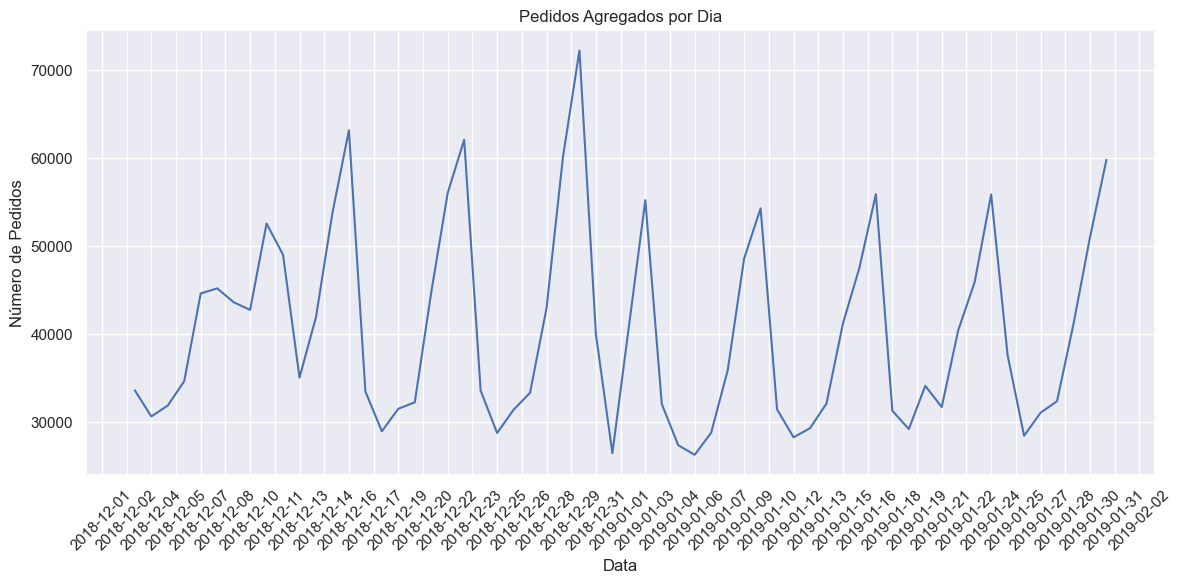

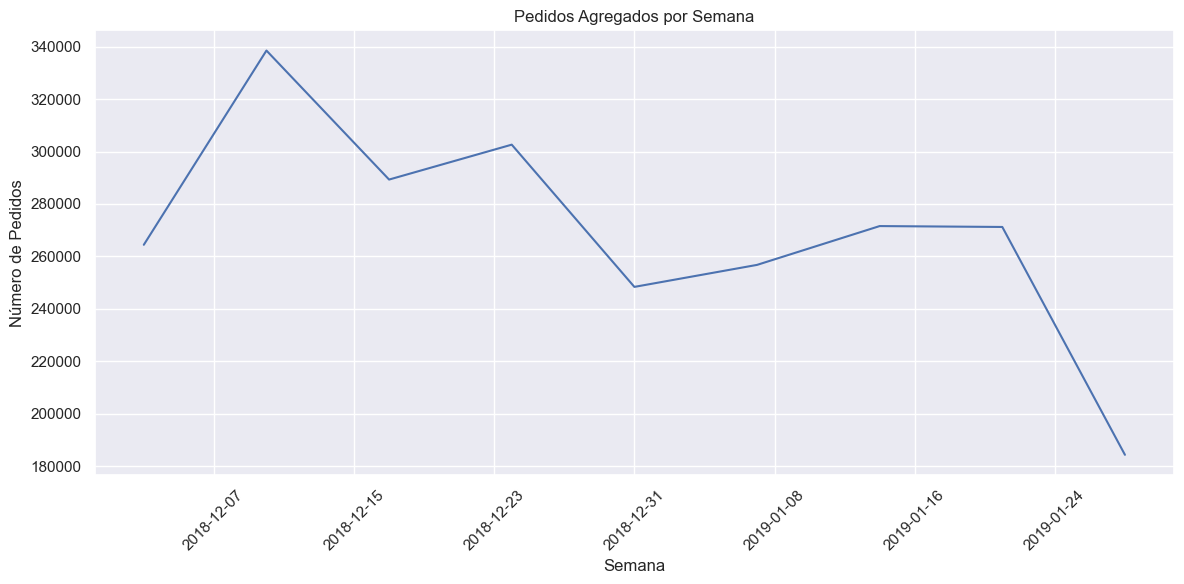

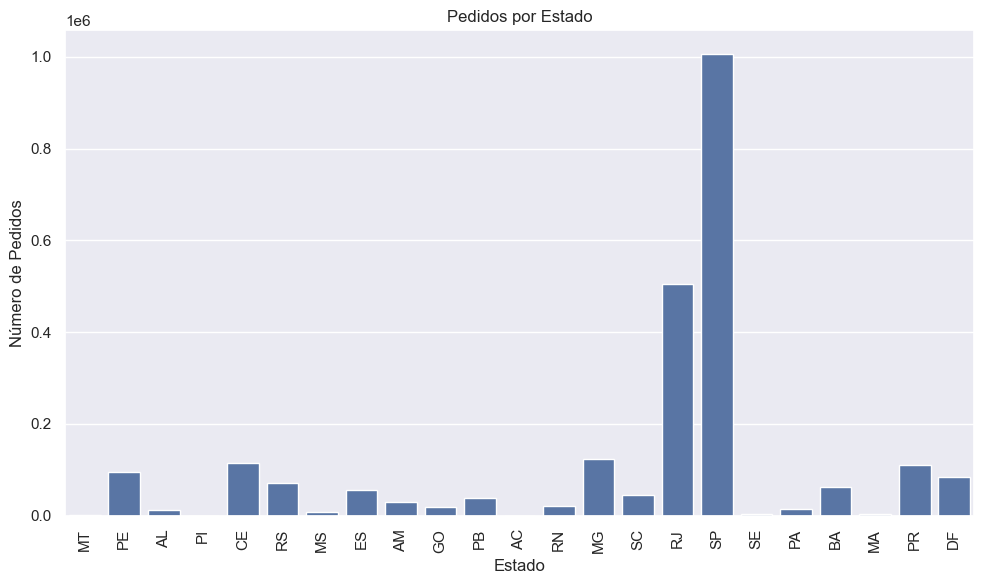

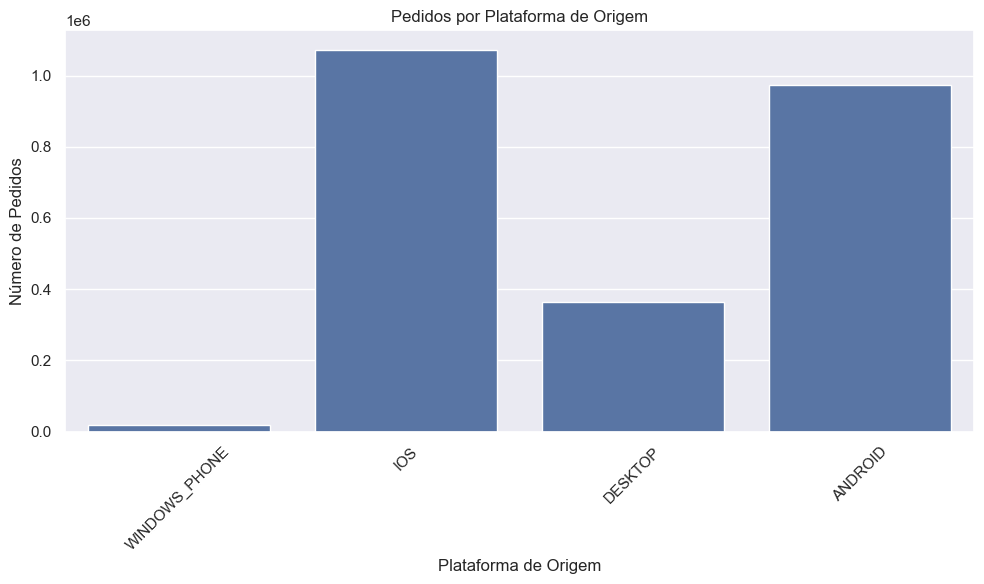

In [30]:
# Agregando por dia
df_daily = df1.group_by("date").agg([
    pl.count("order_id").alias("order_count")
])

# Agregando por semana
df_weekly = df1.group_by("year_week").agg([
    pl.count("order_id").alias("order_count")
])

# Convertendo para pandas
df_daily_pd = df_daily.to_pandas()
df_weekly_pd = df_weekly.to_pandas()

# Gráfico de pedidos agregados por dia
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily_pd, x="date", y="order_count")
plt.title("Pedidos Agregados por Dia")
plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(60))  
plt.tight_layout()

# Gráfico de pedidos agregados por semana
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_weekly_pd, x="year_week", y="order_count")
plt.title("Pedidos Agregados por Semana")
plt.xlabel("Semana")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9)) 
plt.tight_layout()

# Gráficos adicionais por 'state' e 'origin_platform'
# Pedidos por estado
df_state = df1.group_by("delivery_address_state").agg([
    pl.count("order_id").alias("order_count")
])

# Convertendo para pandas
df_state_pd = df_state.to_pandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_state_pd, x="delivery_address_state", y="order_count")
plt.title("Pedidos por Estado")
plt.xlabel("Estado")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=90)
plt.tight_layout()

# Pedidos por plataforma de origem
df_platform = df1.group_by("origin_platform").agg([
    pl.count("order_id").alias("order_count")
])

# Convertendo para pandas
df_platform_pd = df_platform.to_pandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_platform_pd, x="origin_platform", y="order_count")
plt.title("Pedidos por Plataforma de Origem")
plt.xlabel("Plataforma de Origem")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

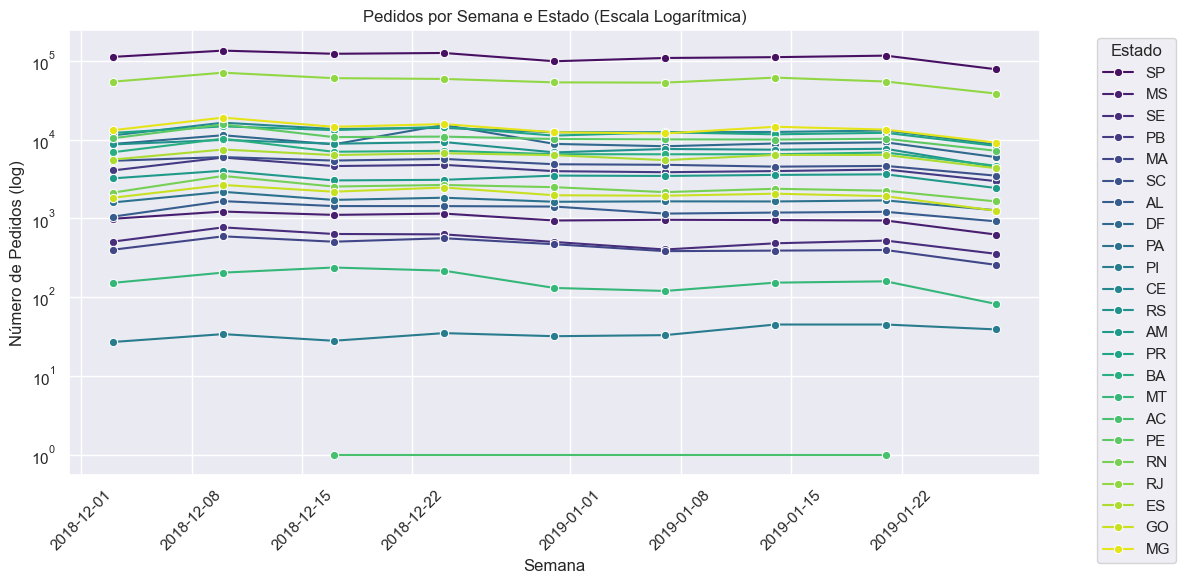

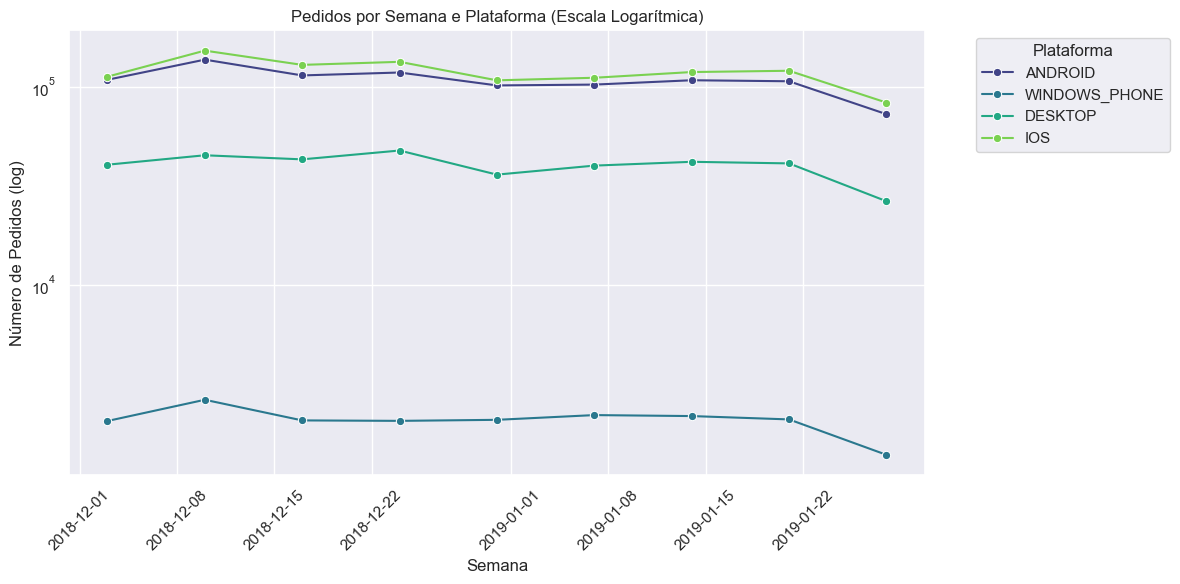

In [31]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Agregando por semana e estado
df_weekly_state = df1.group_by(["year_week", "delivery_address_state"]).agg([
    pl.count("order_id").alias("order_count")
])

# Agregando por semana e plataforma
df_weekly_platform = df1.group_by(["year_week", "origin_platform"]).agg([
    pl.count("order_id").alias("order_count")
])

# Convertendo para pandas
df_weekly_state_pd = df_weekly_state.to_pandas()
df_weekly_platform_pd = df_weekly_platform.to_pandas()

# Gráfico de linhas por estado (escala logarítmica)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_weekly_state_pd, x="year_week", y="order_count", hue="delivery_address_state", palette="viridis", marker="o")
plt.title("Pedidos por Semana e Estado (Escala Logarítmica)")
plt.xlabel("Semana")
plt.ylabel("Número de Pedidos (log)")
plt.yscale('log')  # Escala logarítmica no eixo Y
plt.xticks(rotation=45)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Gráfico de linhas por plataforma (escala logarítmica)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_weekly_platform_pd, x="year_week", y="order_count", hue="origin_platform", palette="viridis", marker="o")
plt.title("Pedidos por Semana e Plataforma (Escala Logarítmica)")
plt.xlabel("Semana")
plt.ylabel("Número de Pedidos (log)")
plt.yscale('log')  # Escala logarítmica no eixo Y
plt.xticks(rotation=45)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Análise do Teste AB

### Análise de Total Amount, Orders e Customers 

In [33]:
# Adicionando as Cores do iFood
ifood_red = '#EA1D2C'  # Vermelho iFood
ifood_orange = '#F15A24'  # Laranja iFood
ifood_gray = '#6C6C6C'  # Cinza iFood


<Figure size 1200x600 with 0 Axes>

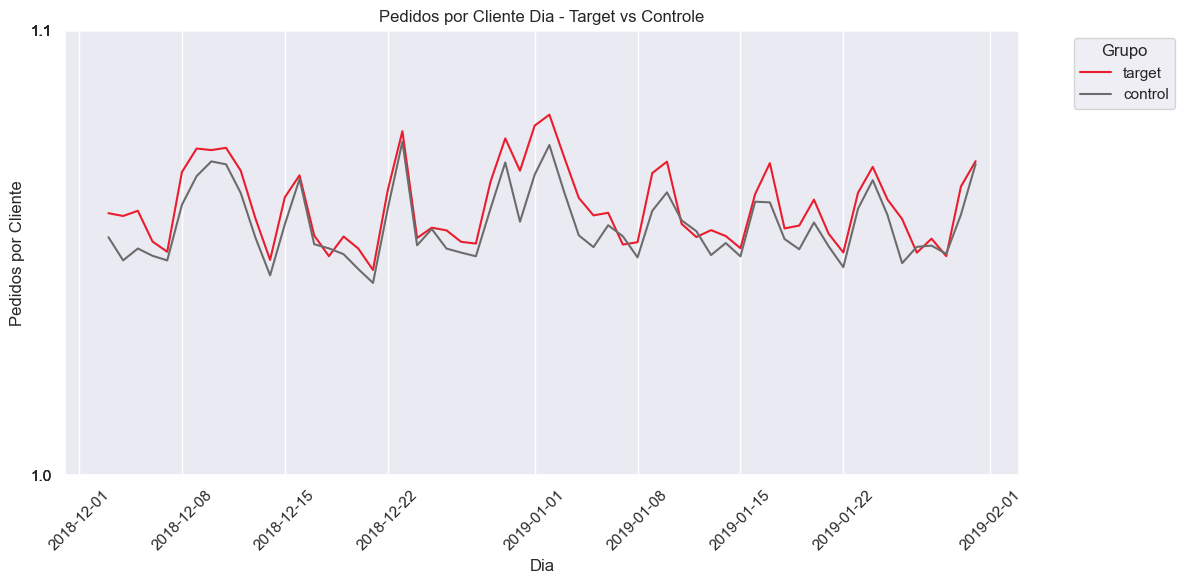

In [34]:
# Agregando por dia e is_target
df_weekly_target = df1.group_by(["date", "is_target"]).agg([
    (pl.col('order_id').n_unique()/pl.col('customer_id').n_unique()).alias('order_per_eater')
])

# Convertendo para pandas
df_weekly_target_pd = df_weekly_target.to_pandas()

# Gráfico de linhas por is_target
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_weekly_target_pd,
    x="date",
    y="order_per_eater",
    hue="is_target",
    palette={"control": ifood_gray, "target": ifood_red}
)
plt.title("Pedidos por Cliente Dia - Target vs Controle")
plt.xlabel("Dia")
plt.ylabel("Pedidos por Cliente")
plt.xticks(rotation=45)
yticks = plt.yticks()[0] 
plt.yticks(np.round(yticks, 1))
plt.legend(title="Grupo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

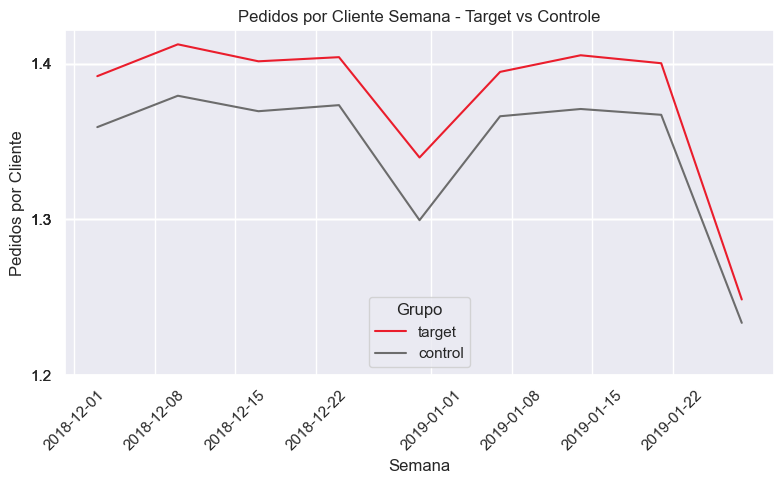

In [35]:
# Agregando por semana e is_target
df_weekly_target = df1.group_by(["year_week", "is_target"]).agg([
    (pl.col('order_id').n_unique()/pl.col('customer_id').n_unique()).alias('order_per_eater')
])

# Convertendo para pandas
df_weekly_target_pd = df_weekly_target.to_pandas()

# Gráfico de linhas por is_target
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_weekly_target_pd,
    x="year_week",
    y="order_per_eater",
    hue="is_target",
    palette={"control": ifood_gray, "target": ifood_red}
)
plt.title("Pedidos por Cliente Semana - Target vs Controle")
plt.xlabel("Semana")
plt.ylabel("Pedidos por Cliente")
plt.xticks(rotation=45)
yticks = plt.yticks()[0] 
plt.yticks(np.round(yticks, 1))
plt.legend(title="Grupo", loc='lower center')
plt.tight_layout()

plt.show()

Durante o período do teste, observamos que o grupo Target apresentou um aumento consistente de 13% no número total de pedidos em comparação ao grupo Controle. Esse aumento foi estatisticamente significativo, com um valor de p de 0,048, indicando que a diferença observada é robusta e não fruto do acaso.

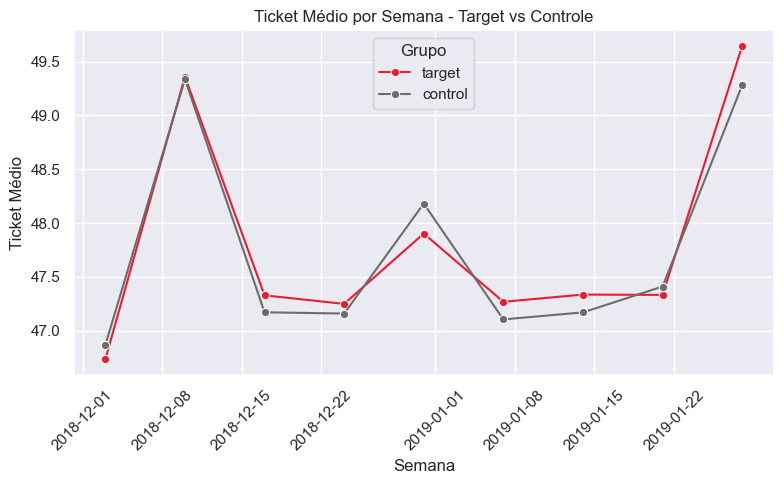

In [36]:
# Agregando por semana e is_target
df_weekly_target = df1.group_by(["year_week", "is_target"]).agg([
    (pl.col('order_total_amount').sum()/pl.col('order_id').n_unique()).alias('avg_ticket')
])

# Convertendo para pandas
df_weekly_target_pd = df_weekly_target.to_pandas()

# Gráfico de linhas por is_target
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_weekly_target_pd,
    x="year_week",
    y="avg_ticket",
    hue="is_target",
    palette={"control": ifood_gray, "target": ifood_red},
    marker="o" 
)
plt.title("Ticket Médio por Semana - Target vs Controle")
plt.xlabel("Semana")
plt.ylabel("Ticket Médio")
plt.xticks(rotation=45)
plt.legend(title="Grupo", loc='upper center')
plt.tight_layout()

plt.show()

Não foi identificada alterações significativas no ticket médio do grupo Target ao longo do período analisado. Esse resultado sugere que as mudanças implementadas não tiveram impacto relevante no valor médio por pedido.


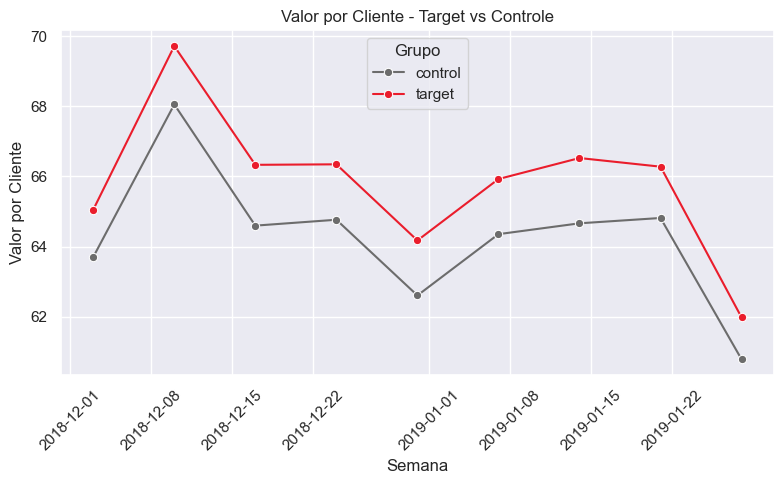

In [37]:
# Agregando por semana e is_target
df_weekly_target = df1.group_by(["year_week", "is_target"]).agg([
    (pl.col('order_total_amount').sum()/pl.col('customer_id').n_unique()).alias('amount_per_customer')
])

# Convertendo para pandas
df_weekly_target_pd = df_weekly_target.to_pandas()

# Gráfico de linhas por is_target
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_weekly_target_pd,
    x="year_week",
    y="amount_per_customer",
    hue="is_target",
    palette={"control": ifood_gray, "target": ifood_red},
    marker="o" 
)
plt.title("Valor por Cliente - Target vs Controle")
plt.xlabel("Semana")
plt.ylabel("Valor por Cliente")
plt.xticks(rotation=45)
plt.legend(title="Grupo", loc='upper center')
plt.tight_layout()

plt.show()

Uma vez que a quantidade de pedidos aumentou mas o ticket médio não, seria esperado um aumento no valor total gasto pelo cliente, o que se confirma ao observar o gráfico

In [38]:
df1.group_by(['is_target','delivery_address_state']).agg(
    pl.col('customer_id').n_unique().alias('customers')
).sort(['delivery_address_state','is_target']).pivot(
    values='customers', 
    index='delivery_address_state', 
    columns='is_target'
).with_columns(
    (pl.col('target') / pl.col('control') - 1).alias('diff')
)


delivery_address_state,control,target,diff
str,u32,u32,f64
"""AC""",1,1,0.0
"""AL""",1971,2371,0.202943
"""AM""",4526,5627,0.243261
"""BA""",10844,13286,0.225194
"""CE""",13281,16968,0.277615
"""DF""",13116,16291,0.242071
"""ES""",7578,9712,0.281605
"""GO""",3367,4236,0.258093
"""MA""",871,994,0.141217


In [39]:
customer = df1.group_by(['year_month', 'is_target']).agg(
    pl.col('order_id').n_unique().alias('total_orders'),
    pl.col('customer_id').n_unique().alias('customers'),
    pl.col('order_total_amount').sum().alias('total_amount'),
    (pl.col('order_total_amount').sum() / pl.col('order_id').n_unique()).alias('avg_ticket'),
    (pl.col('order_id').n_unique() / pl.col('customer_id').n_unique()).alias('order_customer'),
    (pl.col('order_total_amount').sum() / pl.col('customer_id').n_unique()).alias('amount_customer')
)
customer.head()

year_month,is_target,total_orders,customers,total_amount,avg_ticket,order_customer,amount_customer
str,str,u32,u32,f64,f64,f64,f64
"""2019-01""","""control""",495874,229821,2.3740e7,47.875557,2.157653,103.298846
"""2019-01""","""target""",696577,298796,3.3389e7,47.933528,2.33128,111.746453
"""2018-12""","""control""",514819,241537,2.4493e7,47.57509,2.131429,101.402933
"""2018-12""","""target""",720033,313035,3.4278e7,47.605573,2.300168,109.500801


In [40]:
#Para testar a hipotese será considerado todo o periodo do teste separado por mês
#delivery_address_state será adicionado como uma dimensão
#para aumentar a quantidade de observações e aumentar a confiança do teste

customer = df1.group_by(['year_month', 'is_target', 'delivery_address_state' ]).agg(
    (pl.col('order_total_amount').sum() / pl.col('order_id').n_unique()).alias('avg_ticket'),
    (pl.col('order_id').n_unique() / pl.col('customer_id').n_unique()).alias('order_customer'),
    (pl.col('order_total_amount').sum() / pl.col('customer_id').n_unique()).alias('amount_customer')
)
customer.head()
# Lista de variáveis para análise
variaveis = ['avg_ticket', 'order_customer', 'amount_customer']

resultados = []

# Calcular p-valor, estatística t e Cohen's d para cada variável
for var in variaveis:
    # Separar os dados dos grupos
    grupo_controle = customer.filter(pl.col("is_target") == "control")[var].to_list()
    grupo_teste = customer.filter(pl.col("is_target") == "target")[var].to_list()
    
    # Realizar o teste t
    t_stat, p_value = ttest_ind(grupo_controle, grupo_teste)
    
    # Calcular Cohen's d
    d = cohens_d(grupo_controle, grupo_teste)
    
    # Armazenar os resultados
    resultados.append({
        'Variável': var,
        'Estatística t': t_stat,
        'Valor p': p_value,
        "Cohen's d": d
    })

# Criar um DataFrame com os resultados
tabela_resultados = pl.DataFrame(resultados)

# Exibir a tabela de resultados
print(tabela_resultados)

shape: (3, 4)
┌─────────────────┬───────────────┬──────────┬───────────┐
│ Variável        ┆ Estatística t ┆ Valor p  ┆ Cohen's d │
│ ---             ┆ ---           ┆ ---      ┆ ---       │
│ str             ┆ f64           ┆ f64      ┆ f64       │
╞═════════════════╪═══════════════╪══════════╪═══════════╡
│ avg_ticket      ┆ -0.768668     ┆ 0.444148 ┆ 0.162049  │
│ order_customer  ┆ -1.998755     ┆ 0.048721 ┆ 0.421375  │
│ amount_customer ┆ -1.711428     ┆ 0.090525 ┆ 0.360801  │
└─────────────────┴───────────────┴──────────┴───────────┘


In [41]:
#Será aplicado um limite inferior e superior afim de remover outliars e aumentar a eficiencia do teste

# Calcular Q1, Q3 e IQR
q1 = np.percentile(df1["order_total_amount"], 25)
q3 = np.percentile(df1["order_total_amount"], 75)
iqr = q3 - q1

# Definir limites
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar os dados para remover outliers
df1_filtrado = df1.filter(
    (pl.col("order_total_amount") >= limite_inferior) &
    (pl.col("order_total_amount") <= limite_superior)
)

# Verificar o impacto da remoção de outliers
print(f"Total de linhas antes do filtro: {len(df1)}")
print(f"Total de linhas após o filtro: {len(df1_filtrado)}")
print(f"Linhas removidas: {len(df1) - len(df1_filtrado)}")

Total de linhas antes do filtro: 2427303
Total de linhas após o filtro: 2287777
Linhas removidas: 139526


In [42]:
#Sampleando o grupo target para o mesmo tamanho do grupo controle  

grupo_controle = ab_test_ref.filter(pl.col("is_target") == "control")
grupo_teste = ab_test_ref.filter(pl.col("is_target") == "target")

# Verificar o tamanho dos grupos
tamanho_controle = len(grupo_controle)
tamanho_teste = len(grupo_teste)

# Amostrar o grupo de tratamento para igualar ao tamanho do grupo de controle
grupo_teste_sampleado = grupo_teste.sample(n=tamanho_controle, seed=32)

# Criar uma nova base de teste AB com os grupos balanceados
base_teste_ab = pl.concat([grupo_controle, grupo_teste_sampleado])

# Fazer o join com a tabela principal para filtrar os usuários selecionados
df1_final = df1_filtrado.join(
    base_teste_ab,
    on="customer_id",
    how="inner"
)


In [43]:
#Refazendo o teste de hipótese agora com tratamento de outliars e redução do grupo target 

customer = df1_final.group_by(['year_month', 'is_target','delivery_address_state']).agg(
    (pl.col('order_total_amount').sum() / pl.col('order_id').n_unique()).alias('avg_ticket'),
    (pl.col('order_id').n_unique() / pl.col('customer_id').n_unique()).alias('order_customer'),
    (pl.col('order_total_amount').sum() / pl.col('customer_id').n_unique()).alias('amount_customer')
)

variaveis = ['avg_ticket', 'order_customer', 'amount_customer']
resultados = []

# Calcular p-valor, estatística t e Cohen's d para cada variável
for var in variaveis:
    # Separar os dados dos grupos
    grupo_controle = customer.filter(pl.col("is_target") == "control")[var].to_list()
    grupo_teste = customer.filter(pl.col("is_target") == "target")[var].to_list()
    
    # Realizar o teste t
    t_stat, p_value = ttest_ind(grupo_controle, grupo_teste)
    
    # Calcular Cohen's d
    d = cohens_d(grupo_controle, grupo_teste)
    
    # Armazenar os resultados
    resultados.append({
        'Variável': var,
        'Estatística t': t_stat,
        'Valor p': p_value,
        "Cohen's d": d
    })

# Criar um DataFrame com os resultados
tabela_resultados = pl.DataFrame(resultados)
print(tabela_resultados)

shape: (3, 4)
┌─────────────────┬───────────────┬──────────┬───────────┐
│ Variável        ┆ Estatística t ┆ Valor p  ┆ Cohen's d │
│ ---             ┆ ---           ┆ ---      ┆ ---       │
│ str             ┆ f64           ┆ f64      ┆ f64       │
╞═════════════════╪═══════════════╪══════════╪═══════════╡
│ avg_ticket      ┆ -1.006237     ┆ 0.31706  ┆ 0.212133  │
│ order_customer  ┆ -2.024788     ┆ 0.04592  ┆ 0.426863  │
│ amount_customer ┆ -2.01594      ┆ 0.046856 ┆ 0.424997  │
└─────────────────┴───────────────┴──────────┴───────────┘


Após a análise estatística, observamos que, enquanto a variável avg_ticket não apresentou significância estatística, as variáveis order_customer e amount_customer apresentaram diferenças significativas com um efeito moderado.

Isso sugere que as diferenças entre os grupos para essas duas variáveis são não apenas estatisticamente significativas, mas também possuem uma magnitude prática relevante.

### Análise de Retenção

In [44]:
# Agrupar por mês, estado e grupo (controle e teste)
clientes_por_mes_estado = (
    df1.group_by(["year_month", "delivery_address_state", "is_target"])
    .agg(pl.col("customer_id").unique().alias("clientes_ativos"))
    .sort(["is_target", "delivery_address_state", "year_month"])  
)

# Adicionar o mês anterior (usando shift dentro de cada grupo e estado)
clientes_por_mes_estado = clientes_por_mes_estado.with_columns(
    pl.col("year_month").shift(1).over(["is_target", "delivery_address_state"]).alias("previous_month"),
    pl.col("clientes_ativos").shift(1).over(["is_target", "delivery_address_state"]).alias("clientes_ativos_previous")
)

# Filtrar para manter apenas os meses consecutivos
retencao_mensal_estado = clientes_por_mes_estado.filter(
    pl.col("previous_month").is_not_null()
)

# Calcular a taxa de retenção
retencao_mensal_estado = retencao_mensal_estado.with_columns(
    (pl.col("clientes_ativos").list.set_intersection(pl.col("clientes_ativos_previous")).list.len() / pl.col("clientes_ativos_previous").list.len()).alias("retention_rate")
)

retencao_mensal_estado = retencao_mensal_estado.select(
    ["year_month", "delivery_address_state", "is_target", "retention_rate"]
).sort(["year_month", "delivery_address_state", "is_target"])

print(retencao_mensal_estado)

shape: (44, 4)
┌────────────┬────────────────────────┬───────────┬────────────────┐
│ year_month ┆ delivery_address_state ┆ is_target ┆ retention_rate │
│ ---        ┆ ---                    ┆ ---       ┆ ---            │
│ str        ┆ str                    ┆ str       ┆ f64            │
╞════════════╪════════════════════════╪═══════════╪════════════════╡
│ 2019-01    ┆ AL                     ┆ control   ┆ 0.386777       │
│ 2019-01    ┆ AL                     ┆ target    ┆ 0.485822       │
│ 2019-01    ┆ AM                     ┆ control   ┆ 0.458111       │
│ 2019-01    ┆ AM                     ┆ target    ┆ 0.545122       │
│ 2019-01    ┆ BA                     ┆ control   ┆ 0.410727       │
│ 2019-01    ┆ BA                     ┆ target    ┆ 0.480304       │
│ 2019-01    ┆ CE                     ┆ control   ┆ 0.521502       │
│ 2019-01    ┆ CE                     ┆ target    ┆ 0.584467       │
│ 2019-01    ┆ DF                     ┆ control   ┆ 0.367115       │
│ 2019-01    ┆ DF  

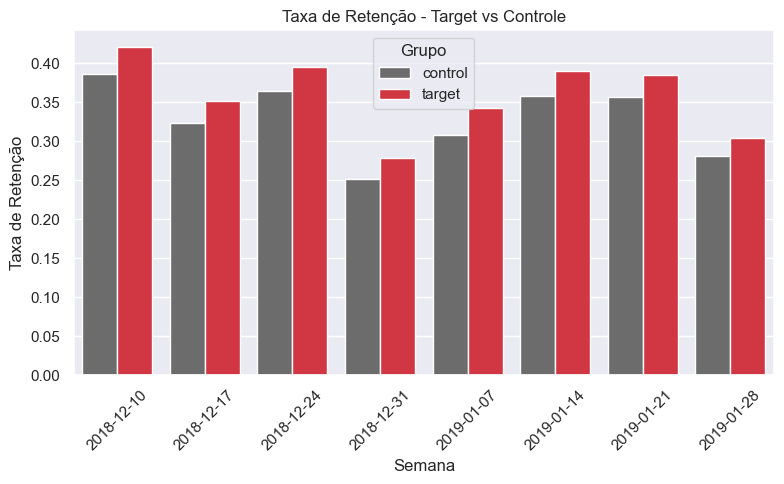

In [45]:
clientes_por_semana = (
    df1.group_by(["year_week", "is_target"])
    .agg(pl.col("customer_id").unique().alias("clientes_ativos"))
    .sort(["is_target", "year_week"])  # Ordenar por grupo, estado e mês
)


clientes_por_semana = clientes_por_semana.with_columns(
    pl.col("year_week").shift(1).over(["is_target"]).alias("previous_week"),
    pl.col("clientes_ativos").shift(1).over(["is_target"]).alias("clientes_ativos_previous")
)

clientes_por_semana = clientes_por_semana.filter(
    pl.col("previous_week").is_not_null()
)

clientes_por_semana = clientes_por_semana.with_columns(
    (pl.col("clientes_ativos").list.set_intersection(pl.col("clientes_ativos_previous")).list.len() / pl.col("clientes_ativos_previous").list.len()).alias("retention_rate")
)

clientes_por_semana = clientes_por_semana.select(
    ["year_week", "is_target", "retention_rate"]
).sort(["year_week", "is_target"])

clientes_por_semana = clientes_por_semana.to_pandas()

# Gráfico de linhas por is_target
plt.figure(figsize=(8, 5))
sns.barplot(
    data=clientes_por_semana,
    x="year_week",
    y="retention_rate",
    hue="is_target",
    palette={"control": ifood_gray, "target": ifood_red}
)
plt.title("Taxa de Retenção - Target vs Controle")
plt.xlabel("Semana")
plt.ylabel("Taxa de Retenção")
plt.xticks(rotation=45)
plt.legend(title="Grupo", loc='upper center')
plt.tight_layout()

plt.show()

In [46]:
# Separar os dados em dois grupos
retencao_control = retencao_mensal_estado.filter(pl.col("is_target") == "control")['retention_rate'].to_list()
retencao_target = retencao_mensal_estado.filter(pl.col("is_target") == "target")['retention_rate'].to_list()


# Realizar o teste t
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(retencao_control, retencao_target)

d = cohens_d(retencao_control, retencao_target)

# Exibir os resultados
print(f"Cohen's d: {d}")
print(f"Estatística t: {t_stat}")
print(f"Valor p: {p_value}")

Cohen's d: 0.7257580772066272
Estatística t: -2.4070672306641683
Valor p: 0.020555084270987466


Os resultados indicam que as variáveis retention_rate, amount_customer e order_customer foram significativamente impactadas.

Os ajustes necessários foram aplicados para calcular os valores de uplift. A partir deste ponto, a análise será conduzida com base na tabela anterior ao tratamento, considerando que ela representa um recorte oficial do GMV da empresa.

A única exceção são os valores extremos, que foram removidos no início deste notebook para garantir a precisão das análises.

### Resultados agregados

In [47]:
resultado_agregado = df1.group_by('is_target').agg(
    (pl.col('order_id').n_unique()/pl.col('customer_id').n_unique()).alias('order_per_eater'),
    pl.col('order_total_amount').mean().alias('avg_ticket'),
    pl.col('customer_id').n_unique().alias('customers'),
    (pl.col('order_total_amount').sum()/pl.col('customer_id').n_unique()).alias('amount_per_eater')
).sort(['is_target'])

# Pivotar a tabela para ter colunas separadas para 'control' e 'target'
resultado_pivot = resultado_agregado.melt(id_vars='is_target').pivot(
    values='value',
    index='variable',
    columns='is_target',
    aggregate_function='first'
)

# Calcular a diferença entre 'target' e 'control'
resultado_pivot = resultado_pivot.with_columns(
    (pl.col('target') - pl.col('control')).alias('diff')
)

resultado_pivot = resultado_pivot.with_columns(
    pl.col(pl.Float64).round(2)  
)

In [48]:
# Agrupar por mês e grupo (controle e teste)
clientes_por_mes = (
    df1.group_by(["year_month", "is_target"])
    .agg(pl.col("customer_id").unique().alias("clientes_ativos"))
    .sort(["is_target", "year_month"])  # Ordenar por grupo e mês
)

# Adicionar o mês anterior (usando shift dentro de cada grupo)
clientes_por_mes = clientes_por_mes.with_columns(
    pl.col("year_month").shift(1).over("is_target").alias("previous_month"),
    pl.col("clientes_ativos").shift(1).over("is_target").alias("clientes_ativos_previous")
)

# Filtrar para manter apenas os meses consecutivos
retencao_mensal_geral = clientes_por_mes.filter(
    pl.col("previous_month").is_not_null()
)

# Calcular a taxa de retenção
retencao_mensal_geral = retencao_mensal_geral.with_columns(
    # Interseção entre clientes ativos no mês atual e no mês anterior
    (pl.col("clientes_ativos").list.set_intersection(pl.col("clientes_ativos_previous")).list.len() / pl.col("clientes_ativos_previous").list.len()).alias("taxa_retencao")
)

# Selecionar e ordenar as colunas relevantes
retencao_mensal_geral = retencao_mensal_geral.select(
    ["year_month", "is_target", "taxa_retencao"]
).sort(["year_month", "is_target"])

# Exibir a taxa de retenção mensal geral por grupo
print(retencao_mensal_geral)

shape: (2, 3)
┌────────────┬───────────┬───────────────┐
│ year_month ┆ is_target ┆ taxa_retencao │
│ ---        ┆ ---       ┆ ---           │
│ str        ┆ str       ┆ f64           │
╞════════════╪═══════════╪═══════════════╡
│ 2019-01    ┆ control   ┆ 0.458861      │
│ 2019-01    ┆ target    ┆ 0.530049      │
└────────────┴───────────┴───────────────┘


In [49]:
# Exibir o resultado final
print(resultado_pivot)

shape: (4, 4)
┌──────────────────┬──────────┬──────────┬─────────┐
│ variable         ┆ control  ┆ target   ┆ diff    │
│ ---              ┆ ---      ┆ ---      ┆ ---     │
│ str              ┆ f64      ┆ f64      ┆ f64     │
╞══════════════════╪══════════╪══════════╪═════════╡
│ order_per_eater  ┆ 2.8      ┆ 3.18     ┆ 0.37    │
│ avg_ticket       ┆ 47.72    ┆ 47.77    ┆ 0.04    │
│ customers        ┆ 360526.0 ┆ 445907.0 ┆ 85381.0 │
│ amount_per_eater ┆ 133.78   ┆ 151.75   ┆ 17.97   │
└──────────────────┴──────────┴──────────┴─────────┘


## Calculo de Retorno sobre o Investimento

In [50]:
#Valor arrecadado com iFood Fee
df1['ifood_fee'].sum()

13907973.7248

In [51]:
#Criando uma tabela com valores financeiros

pl.Config.set_fmt_float("full")

roi_table  = df1.group_by(["is_target"]).agg(
    pl.col("ifood_fee").sum().alias("fee_amount").round(2), #Valor arrecadado com a taxa do iFood
    pl.col("order_total_amount").sum().alias("GMV").round(2), #Volume Bruto 
    pl.col("discount").sum().alias("cupom_spending").round(2), #Valor gasto em cupom considerando 25% até R$10
    pl.col("discount_scn2").sum().alias("cupom_spending_scn2").round(2), #Valor gasto em cupom de R$10 p/ valor minimo de R$40
    pl.col("discount_scn3").sum().alias("cupom_spending_scn3").round(), #Valor gasto em cupom de 33% até R$10
    pl.col("discount_scn4").sum().alias("cupom_spending_scn4").round(2), #Valor gasto em cupom de R$15 p/ valor minimo de R$60
    pl.col("order_id").n_unique().alias("total_orders"), #pedidos
    pl.col("order_total_amount").mean().alias("average_ticket").round(1) #ticket medio
    
).melt(id_vars='is_target').pivot(
    values='value',
    index='variable',
    columns='is_target',
    aggregate_function='first'
)

roi_table

variable,target,control
str,f64,f64
"""fee_amount""",8120037.2,5787936.53
"""GMV""",67666976.65,48232804.39
"""cupom_spending""",11759773,0
"""cupom_spending_scn2""",6863600,0
"""cupom_spending_scn3""",12872626,0
"""cupom_spending_scn4""",4693140,0
"""total_orders""",1416610,1010693
"""average_ticket""",47.8,47.7


<h3>Definição do KPI de Sucesso</h3>

Quando o objetivo é aumentar GMV ou Market Share, a métrica mais apropriada para análise é o GMV total. Em cenários onde a prioridade é rentabilidade, a métrica mais adequada é uma linha de revenue, considerando um iFood Fee de 12% sobre as transações.


<h3>Cálculo da Rentabilidade</h3>
O impacto financeiro da campanha foi estimado com um incremento de 12,7% no Gross Booking, aplicando a fee amount sobre esse crescimento para determinar o iFood Fee em um cenário de rentabilidade.



In [52]:
#para definir o kpi de sucesso é importante definir o objetivo do teste. 
#considerando que o Objetivo do Teste AB é aumentar o GMV ou o Marketshare
#a primeira opção seria analisar o GMV em si como um indicador de sucesso

#considerando que a campanha seria buscando rentabilidade, o KPI de sucesso seria uma linha de revenue
#Nesse caso, será simulado apenas um "iFood Fee" de 12% 

#podem ser feitas outras analises a depender do objetivo do teste, caso o objetivo do teste fosse por exemplo aumentar a retenção de usuários ou a aquisição ou reativação de usuarios seria possível chegar em um valor incremental de usuários,
#nesse caso para analisar a financeira do teste pode se comparar o investimento com o lifetime value desses usuarios incrementais.
#efeito residual filme ao inves de uma foto, o impacto nos meses seguintes também é um efeito causal do teste.

#fee amount & gross_booking aplicados a 12.7% de incremento em GB devido ao teste AB

#selecionando fee amount para calcular o iFoodFee em um cenário de Rentabilidade da campanha
target_ifood_fee = roi_table['target'][0]  
ifood_fee_value = round((target_ifood_fee * 0.127),2)  # aplicando 12.7% de incremento


print(f"Valor de iFood Fee incremental arrecadado com campanha: R$ {ifood_fee_value:,.2f}")

Valor de iFood Fee incremental arrecadado com campanha: R$ 1,031,244.72


In [53]:
#selecionando GMV para calcular o incremento em Volume ou Marketshare
target_gmv = roi_table['target'][1]  
gmv_value = round((target_gmv * 0.127),2)  # aplicando 12.7% de incremento


print(f"GMV incremental arrecadado com campanha: R$ {gmv_value:,.2f}")

GMV incremental arrecadado com campanha: R$ 8,593,706.03


In [54]:
# Calcular o GMV incremental e o valor gasto com a campanha
gmv_vs_spending = (target_gmv * 0.127) - roi_table['target'][2]  
ifood_fee_vs_spending = (roi_table['target'][0] * 0.127) - roi_table['target'][2]

# Exibindo os resultados com separação de milhar e 2 casas decimais
print(f"GMV incremental arrecadado subtraído do valor gasto com campanha: R$ {gmv_vs_spending:,.2f}")
print(f"iFood fee incremental subtraído do valor gasto com campanha: R$ {ifood_fee_vs_spending:,.2f}")


GMV incremental arrecadado subtraído do valor gasto com campanha: R$ -3,166,066.97
iFood fee incremental subtraído do valor gasto com campanha: R$ -10,728,528.28


<h4> Ambos, após a subtração, indicam que a campanha não foi efetiva em termos de incremento de volume ou rentabilidade. <h4> 

### Cenário hipotético onde o cupom de desconto de R$$10 era limitado a pedidos com valor minimo de R$40

Resposta questão 1-B

In [55]:
ifood_fee = roi_table['target'][0]
ifood_fee

8120037.2

In [56]:
# Filtrar pedidos abaixo de 40 e reduzir o aumento de 12.7% uma vez que não seriam impactados pela campanha
gmv_under40 = df1.filter(pl.col("order_total_amount") < 40).group_by("is_target").agg(
    pl.col("order_total_amount").sum().alias("total_amount") * (1-0.127)
)['total_amount'][0]
gmv_under40

16728226.956017578

In [57]:
ifood_fee_under40 = df1.filter(pl.col("order_total_amount") < 40).group_by("is_target").agg(
    pl.col("ifood_fee").sum().alias("total_amount") * (1-0.127)
)['total_amount'][0]
ifood_fee_under40

1431840.4701583541

In [58]:
target_gmv

67666976.65

In [59]:
#agora que o GMV de pedidos abaixo de R$40 foi removido esse será o GMV 
new_gmv = (target_gmv - gmv_under40)
new_gmv

50938749.69398243

In [60]:
#Novo GMV Incremental
new_incremental_gmv = new_gmv * 0.127
new_incremental_gmv

6469221.211135768

In [61]:
new_ifood_fee = (ifood_fee - ifood_fee_under40)
new_ifood_fee

6688196.729841646

In [62]:
incremental_ifoodfee = new_ifood_fee * 0.127
incremental_ifoodfee

849400.984689889

In [63]:
gmv_vs_spending = new_incremental_gmv - roi_table['target'][3]  
ifood_fee_vs_spending = incremental_ifoodfee - roi_table['target'][3]

# Exibindo os resultados com separação de milhar e 2 casas decimais
print(f"GMV incremental arrecadado subtraído do valor gasto com campanha: R$ {gmv_vs_spending:,.2f}")
print(f"iFood fee incremental subtraído do valor gasto com campanha: R$ {ifood_fee_vs_spending:,.2f}")

GMV incremental arrecadado subtraído do valor gasto com campanha: R$ -394,378.79
iFood fee incremental subtraído do valor gasto com campanha: R$ -6,014,199.02


In [64]:
new_incremental_gmv

6469221.211135768

Em um cenário onde o iFood busca aumentar o GMV ou Marketshare, limitar o uso do cupom para um valor mínimo poderia gerar um aumento incremental de 12,4%. No entanto, isso não traria rentabilidade. Isso sugere que um cupom focado em aumentar o ticket médio poderia oferecer um retorno financeiro mais significativo, desde que bem estruturado.

## Segmentação com Método RFM

O método RFM foi escolhido por ser auto-regulável, permitindo a criação de clusters baseados na amostra de usuários. Isso é possível devido à divisão em quantis, o que facilita a segmentação. Além disso, é uma abordagem visualmente clara, especialmente quando representada em uma matriz de calor, e permite transformar os resultados em insights qualitativos de maneira simples.

In [65]:
#Criando uma base de agregada pelo customer_id

customers = df1.group_by(['is_target','customer_id']).agg(
    pl.col('order_id').n_unique().alias('total_orders'),
    pl.col('order_total_amount').mean().alias('avg_ticket'),
    pl.col('order_total_amount').sum().alias('order_total_amount'),
    pl.col("order_created_at").max().alias("last_day_order")
)

In [66]:
#Criando uma coluna de recencia baseada no dia em que o cliente fez seu último pedido 

# Data atual (supondo que seja a mais recente do dataset)
max_date = df1.select(pl.col("order_created_at").max()).item()

# Calcular os dias desde a última compra
customers = customers.with_columns(
   ((max_date - pl.col("last_day_order") ).dt.total_milliseconds() / 86400000).round().alias("days_since_last_order"))



In [67]:
#Converter em pandas para facilitar o manejado da base

customers_rfm = customers.to_pandas()
customers_rfm = customers_rfm
customers_rfm.head()

,is_target,customer_id,total_orders,avg_ticket,order_total_amount,last_day_order,days_since_last_order
0,control,83a0fe80ce8a36c806c02a659ca52a47fd874e5bef28e7...,9,108.444444,976.00,2019-01-31 20:55:47,0.0
1,control,388f0d2b3dbf3dd4bb90e69b101339a139caa8d86000d0...,4,42.610000,170.44,2019-01-25 13:34:57,6.0
2,target,27920b558fb86776c437ddad1a9df6f6415948b89a13c6...,2,60.005000,120.01,2018-12-23 00:54:03,40.0
3,control,81e43d406fa093d1a620886ad56ab0a6cc83f32fa7cf6c...,7,52.785714,369.50,2019-01-24 16:40:15,7.0
4,target,332e477529e30b1809b884b9c4494c2900d1e81cc96d86...,6,44.060000,264.36,2019-01-31 23:29:00,0.0


In [68]:
customers_rfm['total_orders'] = customers_rfm['total_orders'].astype(float)
customers_rfm['order_total_amount'] = customers_rfm['order_total_amount'].astype(float)
customers_rfm

,is_target,customer_id,total_orders,avg_ticket,order_total_amount,last_day_order,days_since_last_order
0,control,83a0fe80ce8a36c806c02a659ca52a47fd874e5bef28e7...,9.0,108.444444,976.00,2019-01-31 20:55:47,0.0
1,control,388f0d2b3dbf3dd4bb90e69b101339a139caa8d86000d0...,4.0,42.610000,170.44,2019-01-25 13:34:57,6.0
2,target,27920b558fb86776c437ddad1a9df6f6415948b89a13c6...,2.0,60.005000,120.01,2018-12-23 00:54:03,40.0
3,control,81e43d406fa093d1a620886ad56ab0a6cc83f32fa7cf6c...,7.0,52.785714,369.50,2019-01-24 16:40:15,7.0
4,target,332e477529e30b1809b884b9c4494c2900d1e81cc96d86...,6.0,44.060000,264.36,2019-01-31 23:29:00,0.0
...,...,...,...,...,...,...,...
806428,target,27eaa96044a871226612090a581e9b344964b30456a5f6...,2.0,28.445000,56.89,2019-01-10 23:19:34,21.0
806429,target,85821debf651a12098bcf5b22deed4d2a2807d5523ce61...,1.0,54.800000,54.80,2019-01-15 17:55:00,16.0
806430,control,b33f5aca5a89886d17eb3c4b742839a931ae0d6c6a2253...,3.0,37.633333,112.90,2019-01-30 13:50:08,1.0
806431,control,70711a1687e4ade6122255818480c5704b1f0683413c84...,1.0,49.900000,49.90,2018-12-20 23:58:23,42.0


In [69]:
 # Recência (menor valor = mais recente)
customers_rfm['R'] = pd.qcut(customers_rfm['days_since_last_order'], q=5, labels=[5, 4, 3, 2, 1], duplicates="drop")

In [70]:
 # Frequência (maior valor = mais pedidos)
customers_rfm['F'] = pd.qcut(customers_rfm['total_orders'].rank(method="first"), q=5, labels=[1, 2, 3, 4,5])

In [71]:
 # Valor Monetário (maior valor = maior gasto)
customers_rfm['M'] = pd.qcut(customers_rfm['order_total_amount'], q=5, labels=[1, 2, 3, 4, 5], duplicates="drop")


In [72]:
def create_rfm_segment(row):
    r = row["R"]
    f = row["F"]
    m = row["M"]

    if r >= 4 and f >= 4 and m >= 4:
        return "Campeões"
    elif r >= 3 and f >= 3 and m >= 3:
        return "Clientes Leais"
    elif r <= 2 and (f >= 3 or m >= 3):
        return "Clientes em Risco"
    else:
        return "Inativos"
        
# Aplicar a segmentação
customers_rfm["RFM_Segment"] = customers_rfm.apply(create_rfm_segment, axis=1)


# Exibir o DataFrame com os segmentos
customers_rfm.head()


,is_target,customer_id,total_orders,avg_ticket,order_total_amount,last_day_order,days_since_last_order,R,F,M,RFM_Segment
0,control,83a0fe80ce8a36c806c02a659ca52a47fd874e5bef28e7...,9.0,108.444444,976.00,2019-01-31 20:55:47,0.0,5,5,5,Campeões
1,control,388f0d2b3dbf3dd4bb90e69b101339a139caa8d86000d0...,4.0,42.610000,170.44,2019-01-25 13:34:57,6.0,4,4,4,Campeões
2,target,27920b558fb86776c437ddad1a9df6f6415948b89a13c6...,2.0,60.005000,120.01,2018-12-23 00:54:03,40.0,1,3,4,Clientes em Risco
3,control,81e43d406fa093d1a620886ad56ab0a6cc83f32fa7cf6c...,7.0,52.785714,369.50,2019-01-24 16:40:15,7.0,4,5,5,Campeões
4,target,332e477529e30b1809b884b9c4494c2900d1e81cc96d86...,6.0,44.060000,264.36,2019-01-31 23:29:00,0.0,5,5,5,Campeões


In [74]:
customers_rfm.groupby(['RFM_Segment'])[['customer_id', 'total_orders', 'order_total_amount']].agg({'customer_id':'nunique','total_orders':'sum', 'order_total_amount':'sum'} ).sort_values('customer_id')

,customer_id,total_orders,order_total_amount
RFM_Segment,,,
Clientes Leais,126745,369903.0,17454251.13
Clientes em Risco,177580,352862.0,18343070.98
Campeões,186559,1362107.0,67361916.29
Inativos,315549,342431.0,12740542.64


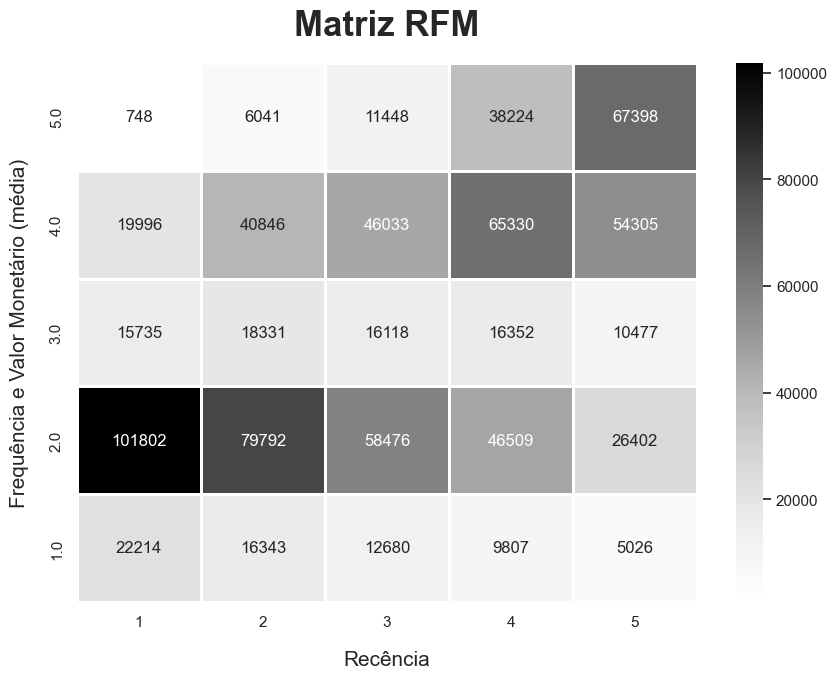

In [75]:
#média entre frequencia e valor monetario

customers_rfm['FM'] = ((customers_rfm['F'].astype(int) + customers_rfm['M'].astype(int))/2).round()

#criando pivot para heatmap
customers_pivot = customers_rfm.pivot_table(index='FM', columns='R', values='customer_id', aggfunc='nunique').sort_index(ascending=False)
customers_pivot = customers_pivot.reindex(columns=sorted(customers_pivot.columns, reverse=False))

plt.figure(figsize=(10,7))
plot = sns.heatmap(customers_pivot,cmap='Greys',linewidth=1, linecolor="white", annot=True, fmt ='.0f')
plot.set_xlabel('Recência', fontsize=15, labelpad=15)
plot.set_ylabel('Frequência e Valor Monetário (média)', fontsize=15, labelpad=15)
plot.set_title('Matriz RFM', fontsize=25, fontweight="bold", pad=20)
plt.show()

In [76]:
#Join com o resultado de cada grupo

customers_rfm_pl = pl.from_pandas(customers_rfm[['customer_id', 'RFM_Segment']])
df2 = df1.join(customers_rfm_pl, on='customer_id', how='left')
df2.head()

order_id,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,delivery_address_zip_code,items,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_scheduled,order_total_amount,origin_platform,is_target,date,year_month,year_week,discount,discount_scn2,discount_scn3,discount_scn4,ifood_fee,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country,amount_vs_ticket,amount_vs_min_ticket,RFM_Segment
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],bool,f64,str,str,date,str,date,f64,f64,f64,f64,f64,str,bool,i64,f64,i64,i64,f64,i64,str,str,str,f64,f64,str
"""3ef963be2ac7a5260d7182e52e481a…","""de9ca4054e41e0de1805d5200598a7…","""CAMILA""","""SAO PAULO""","""BR""","""JARDIM PAULISTA""","""9027854""","""-46.65""","""-23.57""","""SP""","""14020""","""[{""name"": ""GRANDE 2 SABORES"", …","""68b72c264dc0ca7571200ccdfe1b5b…","""-46.65""","""-23.57""","""America/Sao_Paulo""",2018-12-10 23:27:43,false,55,"""ANDROID""","""target""",2018-12-10,"""2018-12""",2018-12-10,10,10,10,0,6.6,"""2017-01-20T13:13:22.567Z""",true,4,80,0,25,30,15260,"""SAO PAULO""","""SP""","""BR""",-0.3125,0.8333333333333333,"""Inativos"""
"""95870659f821e714418f1d49ebb295…","""fc98dfbc5a78c91080fd6597aea796…","""LUIZA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9084537""","""-43.22""","""-22.98""","""RJ""","""22441""","""[{""name"": ""GIGA"", ""addition"": …","""7471334c70f19a4abc75713862bb42…","""-43.22""","""-22.98""","""America/Sao_Paulo""",2018-12-31 00:56:44,false,102.8,"""IOS""","""target""",2018-12-31,"""2018-12""",2018-12-31,10,10,10,15,12.335999999999999,"""2017-01-20T13:15:11.437Z""",true,4,80,0,50,0,22431,"""RIO DE JANEIRO""","""RJ""","""BR""",0.2849999999999999,inf,"""Campeões"""
"""f6364616c31476f181d8a53993e0f7…","""9ed8f6f184b20458ef62e4435d7a53…","""LUCIANA""","""RIO DE JANEIRO""","""BR""","""LEBLON""","""9459967""","""-43.22""","""-22.99""","""RJ""","""22441""","""[{""name"": ""Pacote de Pão Árabe…","""f5b685fda71643a4b5a29201c9fda1…","""-43.22""","""-22.99""","""America/Sao_Paulo""",2018-12-25 23:00:51,false,280,"""IOS""","""target""",2018-12-25,"""2018-12""",2018-12-24,10,10,10,15,33.6,"""2017-01-20T13:12:56.192Z""",false,1,30,30,15,0,22021,"""RIO DE JANEIRO""","""RJ""","""BR""",8.333333333333334,inf,"""Clientes em Risco"""
"""2979ba65e67aacffc2cdaee2993413…","""d9fa6d240fbcc4acb1d51d3c5c00b5…","""PHELIPE""","""JUIZ DE FORA""","""BR""","""CENTRO""","""8975998""","""-43.34""","""-21.77""","""MG""","""36010""","""[{""name"": ""GIGA 2 SABORES"", ""a…","""ff9049ae95bf47cc87642c6a2eddf9…","""-43.34""","""-21.77""","""America/Sao_Paulo""",2018-12-29 22:25:29,false,52.9,"""ANDROID""","""target""",2018-12-29,"""2018-12""",2018-12-24,10,10,10,0,6.348,"""2017-01-20T13:14:45.331Z""",true,3,60,0,30,0,36025,"""JUIZ DE FORA""","""MG""","""BR""",-0.1183333333333334,inf,"""Campeões"""
"""037e2426a20e51da7076abf42b4ad1…","""f8f4b03492411da34db798ebe0efea…","""RODRIGO""","""VITORIA""","""BR""","""JARDIM DA PENHA""","""6424274""","""-40.29""","""-20.29""","""ES""","""29060""","""[{""name"": ""03 - Cheese Egg Bur…","""b0bdf3fd0af7e0536f32403c2700df…","""-40.29""","""-20.29""","""America/Sao_Paulo""",2019-01-29 23:40:44,false,14.5,"""ANDROID""","""control""",2019-01-29,"""2019-01""",2019-01-28,0,0,0,0,1.74,"""2017-01-20T13:15:02.997Z""",true,2,40,0,0,16,29060,"""VITORIA""","""ES""","""BR""",-0.6375,-0.09375,"""Campeões"""


In [77]:
#Visualização das métricas de sucesso para cada grupo

rfm_agregado = df2.group_by(['RFM_Segment']).agg(
    (pl.col('order_id').n_unique() / pl.col('customer_id').n_unique()).alias('order_per_eater'),
    (pl.col('order_total_amount').sum() / pl.col('customer_id').n_unique()).alias('amount_per_eater'),
    pl.col('order_total_amount').mean().alias('avg_ticket'),
    pl.col('customer_id').n_unique().alias('customers'),
    pl.col('order_id').n_unique().alias('orders'),
    pl.col('order_total_amount').sum().round(0).alias('total_amount'),
    pl.col('discount').sum().round(0).alias('total_discount'),
    pl.col('discount_scn2').sum().round(0).alias('total_discount_scn2'),
    pl.col('discount_scn3').sum().round(0).alias('total_discount_scn3'),
    pl.col('discount_scn4').sum().round(0).alias('total_discount_scn4')

).sort('RFM_Segment')
rfm_agregado

RFM_Segment,order_per_eater,amount_per_eater,avg_ticket,customers,orders,total_amount,total_discount,total_discount_scn2,total_discount_scn3,total_discount_scn4
str,f64,f64,f64,u32,u32,f64,f64,f64,f64,f64
"""Campeões""",7.301213021081803,361.07567198415353,49.45420314974646,186559,1362107,67361916,6875267,4163900,7485801,2945595
"""Clientes Leais""",2.9184819914000553,137.71155572227636,47.186022092332095,126745,369903,17454251,1834799,1050430,2010276,691740
"""Clientes em Risco""",1.987059353530803,103.29468960476409,51.98369611920243,177580,352862,18343071,1713011,1070230,1859810,846840
"""Inativos""",1.085191206437035,40.37579786346959,37.206160189994385,315549,342431,12740543,1336697,579040,1516739,208965


In [78]:
#criando uma tabela agregada para facilitar o manuseio dos dados

rfm_agregado = df2.group_by(['is_target', 'RFM_Segment']).agg(
    (pl.col('order_id').n_unique() / pl.col('customer_id').n_unique()).alias('order_per_eater'),
    (pl.col('order_total_amount').sum() / pl.col('customer_id').n_unique()).alias('amount_per_eater'),
    pl.col('order_total_amount').mean().alias('avg_ticket'),
    pl.col('customer_id').n_unique().alias('customers'),
    pl.col('order_id').n_unique().alias('orders'),
    pl.col('order_total_amount').sum().round(0).alias('total_amount'),
    pl.col('discount').sum().round(0).alias('total_discount'),
    pl.col('discount_scn2').sum().round(0).alias('total_discount_scn2'),
    pl.col('discount_scn3').sum().round(0).alias('total_discount_scn3'),
    pl.col('discount_scn4').sum().round(0).alias('total_discount_scn4')

).sort('is_target')
rfm_agregado

is_target,RFM_Segment,order_per_eater,amount_per_eater,avg_ticket,customers,orders,total_amount,total_discount,total_discount_scn2,total_discount_scn3,total_discount_scn4
str,str,f64,f64,f64,u32,u32,f64,f64,f64,f64,f64
"""control""","""Inativos""",1.0686373003606389,40.32983578054198,37.73949848740227,155280,165938,6262417,0,0,0,0
"""control""","""Clientes Leais""",2.903871256843377,137.9108512089632,47.492068005410744,51327,149047,7078550,0,0,0,0
"""control""","""Campeões""",7.2947019867549665,360.27383571856643,49.38842414299004,74896,546344,26983069,0,0,0,0
"""control""","""Clientes em Risco""",1.8901332523442542,100.08184996776825,52.94962661687522,79023,149364,7908768,0,0,0,0
"""target""","""Campeões""",7.305580183229897,361.61348960618346,49.49825756977855,111663,815763,40378847,6875267,4163900,7485801,2945595
"""target""","""Clientes em Risco""",2.064774698905202,105.87074434092027,51.27471989900677,98557,203498,10434303,1713011,1070230,1859810,846840
"""target""","""Clientes Leais""",2.9284255747964676,137.57592179597472,46.979483781327296,75418,220856,10375701,1834799,1050430,2010276,691740
"""target""","""Inativos""",1.1012298073863318,40.420329196557226,36.70471769420334,160269,176493,6478126,1336697,579040,1516739,208965


In [79]:
#A partir de agora serão usados valores dessa tabela para fazer algumas suposições

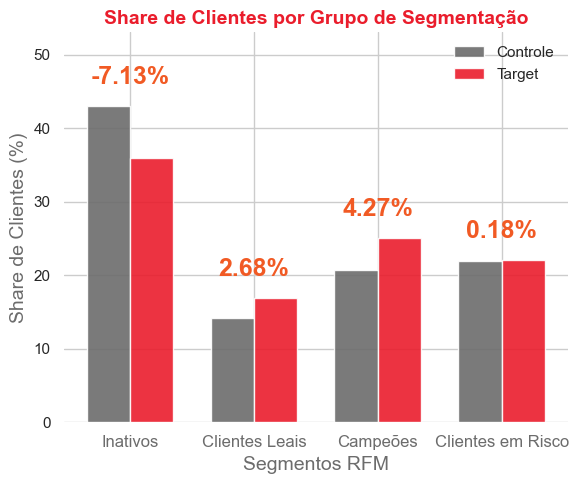

In [80]:
#Share de clientes por grupo de segmentação
# O Grupo Target possui mais clientes Campeões e Clientes Leais
# O Grupo Controle é maior no share de clientes Inativos 

data = rfm_agregado.pivot(
    values='customers', 
    index='RFM_Segment', 
    columns='is_target'
).with_columns( 
    (pl.col('control')/pl.col('control').sum()*100).round(2),
    (pl.col('target')/pl.col('target').sum()*100).round(2),
    (((pl.col('target')/pl.col('target').sum() - pl.col('control')/pl.col('control').sum().round(2))*100).round(2)).alias('diff')
    
)

df_pandas = data.to_pandas()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.35
index = range(len(df_pandas['RFM_Segment']))

bar1 = ax.bar(index, df_pandas['control'], bar_width, label='Controle', color=ifood_gray, alpha=0.9)
bar2 = ax.bar([i + bar_width for i in index], df_pandas['target'], bar_width, label='Target', color=ifood_red, alpha=0.9)

# Adicionar diferença percentual
for i, (control, target, diff) in enumerate(zip(df_pandas['control'], df_pandas['target'], df_pandas['diff'])):
    ax.text(i + bar_width/2, max(control, target) + 3, f'{diff}%', ha='center', color=ifood_orange, fontsize=18, fontweight='bold')

# Ajustar limites do eixo Y para acomodar os valores
max_value = max(df_pandas['control'].max(), df_pandas['target'].max())  # Encontra o valor máximo entre as colunas
ax.set_ylim(0, max_value + 10)  # Aumenta o limite superior em 10%

# Ajustes visuais
ax.set_xlabel('Segmentos RFM', fontsize=14, color=ifood_gray)
ax.set_ylabel('Share de Clientes (%)', fontsize=14, color=ifood_gray)
ax.set_title('Share de Clientes por Grupo de Segmentação', fontsize=14, color=ifood_red, fontweight='bold')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_pandas['RFM_Segment'], fontsize=12, color=ifood_gray)
ax.legend(frameon=False, fontsize=11)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

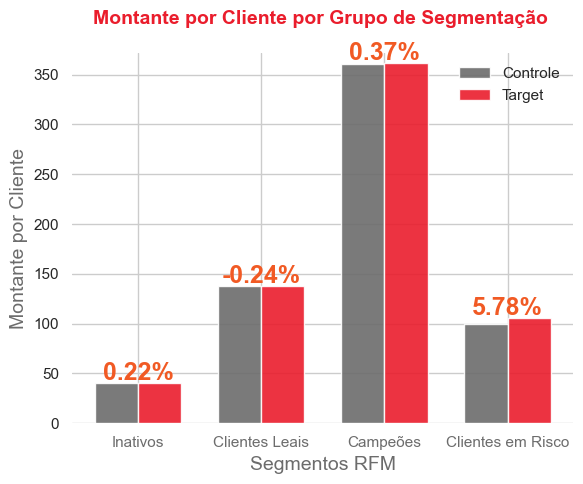

In [81]:

# A campanha parece aumentar o montante gasto apenas dos Clientes em Risco.
#Já dos outros grupos o resultado é marginal

data = rfm_agregado.pivot(
    values='amount_per_eater', 
    index='RFM_Segment', 
    columns='is_target'
).with_columns( 
    pl.col('target').round(2),
    pl.col('control').round(2),
    ((pl.col('target')/pl.col('control')-1)*100).round(2).alias('diff')
    )


df_pandas = data.to_pandas()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.35
index = range(len(df_pandas['RFM_Segment']))

bar1 = ax.bar(index, df_pandas['control'], bar_width, label='Controle', color=ifood_gray, alpha=0.9)
bar2 = ax.bar([i + bar_width for i in index], df_pandas['target'], bar_width, label='Target', color=ifood_red, alpha=0.9)

# Adicionar diferença percentual
for i, (control, target, diff) in enumerate(zip(df_pandas['control'], df_pandas['target'], df_pandas['diff'])):
    ax.text(i + bar_width/2, max(control, target) + 3, f'{diff}%', ha='center', color=ifood_orange, fontsize=18, fontweight='bold')

# Ajustar limites do eixo Y para acomodar os valores
max_value = max(df_pandas['control'].max(), df_pandas['target'].max())  # Encontra o valor máximo entre as colunas
ax.set_ylim(0, max_value + 10)  # Aumenta o limite superior em 10%

# Ajustes visuais
ax.set_xlabel('Segmentos RFM', fontsize=14, color=ifood_gray)
ax.set_ylabel('Montante por Cliente', fontsize=14, color=ifood_gray)
ax.set_title('Montante por Cliente por Grupo de Segmentação \n', fontsize=14, color=ifood_red, fontweight='bold')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_pandas['RFM_Segment'], fontsize=11, color=ifood_gray)
ax.legend(frameon=False, fontsize=11)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

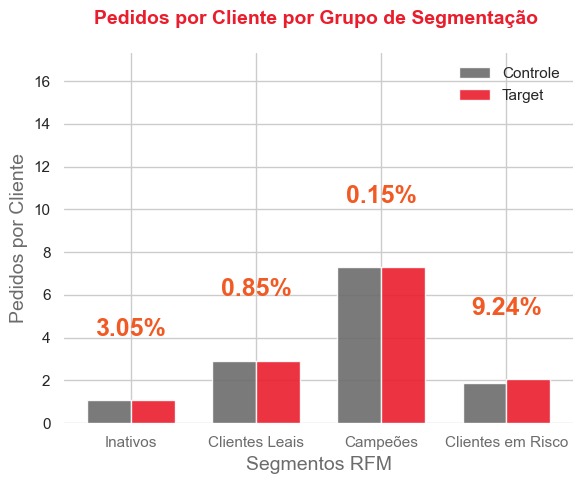

In [82]:
#A campanha indica que aumentou a quantidade de pedidos de clientes Inativos em 3%
#e para clientes em Risco em 9.3%

data =rfm_agregado.pivot(
    values='order_per_eater', 
    index='RFM_Segment', 
    columns='is_target'
).with_columns( 
    pl.col('target').round(2),
    pl.col('control').round(2),
    ((pl.col('target')/pl.col('control')-1)*100).round(2).alias('diff')
    
)

df_pandas = data.to_pandas()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,5))

bar_width = 0.35
index = range(len(df_pandas['RFM_Segment']))

bar1 = ax.bar(index, df_pandas['control'], bar_width, label='Controle', color=ifood_gray, alpha=0.9)
bar2 = ax.bar([i + bar_width for i in index], df_pandas['target'], bar_width, label='Target', color=ifood_red, alpha=0.9)

# Adicionar diferença percentual
for i, (control, target, diff) in enumerate(zip(df_pandas['control'], df_pandas['target'], df_pandas['diff'])):
    ax.text(i + bar_width/2, max(control, target) + 3, f'{diff}%', ha='center', color=ifood_orange, fontsize=18, fontweight='bold')

# Ajustar limites do eixo Y para acomodar os valores
max_value = max(df_pandas['control'].max(), df_pandas['target'].max())  # Encontra o valor máximo entre as colunas
ax.set_ylim(0, max_value + 10)  # Aumenta o limite superior em 10%

# Ajustes visuais
ax.set_xlabel('Segmentos RFM', fontsize=14, color=ifood_gray)
ax.set_ylabel('Pedidos por Cliente', fontsize=14, color=ifood_gray)
ax.set_title('Pedidos por Cliente por Grupo de Segmentação \n', fontsize=14, color=ifood_red, fontweight='bold')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_pandas['RFM_Segment'], fontsize=11, color=ifood_gray)
ax.legend(frameon=False, fontsize=11)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

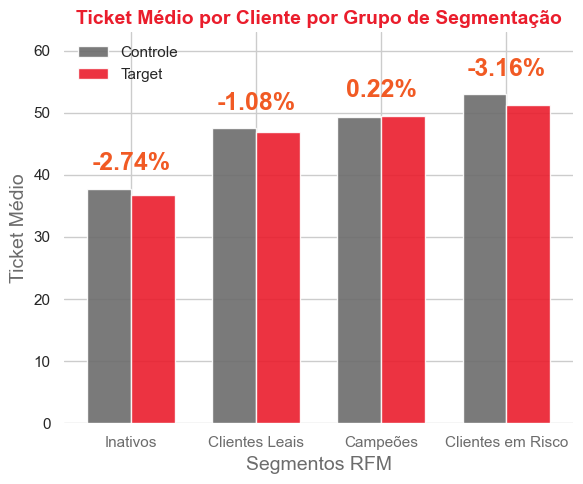

In [83]:
# campanha indica uma redução no ticket médio dos grupos que receberam o cupom
#exceto por campeões que não parece ter surtido efeito. 

data =rfm_agregado.pivot(
    values='avg_ticket', 
    index='RFM_Segment', 
    columns='is_target'
).with_columns( 
    pl.col('target').round(2),
    pl.col('control').round(2),
    ((pl.col('target')/pl.col('control')-1)*100).round(2).alias('diff')
    
)

df_pandas = data.to_pandas()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.35
index = range(len(df_pandas['RFM_Segment']))

bar1 = ax.bar(index, df_pandas['control'], bar_width, label='Controle', color=ifood_gray, alpha=0.9)
bar2 = ax.bar([i + bar_width for i in index], df_pandas['target'], bar_width, label='Target', color=ifood_red, alpha=0.9)

# Adicionar diferença percentual
for i, (control, target, diff) in enumerate(zip(df_pandas['control'], df_pandas['target'], df_pandas['diff'])):
    ax.text(i + bar_width/2, max(control, target) + 3, f'{diff}%', ha='center', color=ifood_orange, fontsize=18, fontweight='bold')

# Ajustar limites do eixo Y para acomodar os valores
max_value = max(df_pandas['control'].max(), df_pandas['target'].max())  # Encontra o valor máximo entre as colunas
ax.set_ylim(0, max_value + 10)  # Aumenta o limite superior em 10%

# Ajustes visuais
ax.set_xlabel('Segmentos RFM', fontsize=14, color=ifood_gray)
ax.set_ylabel('Ticket Médio', fontsize=14, color=ifood_gray)
ax.set_title('Ticket Médio por Cliente por Grupo de Segmentação', fontsize=14, color=ifood_red, fontweight='bold')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_pandas['RFM_Segment'], fontsize=11, color=ifood_gray)
ax.legend(frameon=False, fontsize=11)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## Sugestão de Novas Campanhas

Assumindo que clientes Inativos possuem o menor ticket médio R$37.
- Será criada uma campanha hipotetica onde um cupom de RS10 para RS30
- A ideia é criar uma campanha de engajamento, aumentando a quantidade de pedidos do cliente e seu lifetime value

Assumindo que clientes Leais e Campeões já são engajados ao negócio
- Será criada uma campanha hipotética onde um cupom de RS15 será aplicado a pedidos acima de RS60
- Assumindo que poderá haver uma diminuição na quantidade dos pedidos
- será calculada uma janela de valor onde considerará uma queda de pedidos até 10% 

Para clientes em risco a recomendação é um Cupom de 30% até R$15
- visando aumentar o engajamento e reativar o cliente
- além de que parece ser o grupo que mais engajou com esse tipo de campanha devido ao aumento no número de pedidos em 9%

In [84]:
rfm_agregado_treat = df2.filter(pl.col('is_target') == 'target').group_by(['RFM_Segment']).agg(
    (pl.col('order_id').n_unique() / pl.col('customer_id').n_unique()).alias('order_per_eater'),
    (pl.col('order_total_amount').sum() / pl.col('customer_id').n_unique()).alias('amount_per_eater'),
    pl.col('order_total_amount').mean().alias('avg_ticket'),
    pl.col('customer_id').n_unique().alias('customers'),
    pl.col('order_id').n_unique().alias('orders'),
    pl.col('order_total_amount').sum().round(0).alias('total_amount'),
    pl.col('discount').sum().round(0).alias('total_discount'),
    pl.col('discount_scn2').sum().round(0).alias('total_discount_scn2'),
    pl.col('discount_scn3').sum().round(0).alias('total_discount_scn3'),
    pl.col('discount_scn4').sum().round(0).alias('total_discount_scn4')
)
rfm_agregado_treat

RFM_Segment,order_per_eater,amount_per_eater,avg_ticket,customers,orders,total_amount,total_discount,total_discount_scn2,total_discount_scn3,total_discount_scn4
str,f64,f64,f64,u32,u32,f64,f64,f64,f64,f64
"""Campeões""",7.305580183229897,361.61348960618346,49.49825756977855,111663,815763,40378847,6875267,4163900,7485801,2945595
"""Inativos""",1.1012298073863318,40.420329196557226,36.70471769420334,160269,176493,6478126,1336697,579040,1516739,208965
"""Clientes Leais""",2.9284255747964676,137.57592179597472,46.979483781327296,75418,220856,10375701,1834799,1050430,2010276,691740
"""Clientes em Risco""",2.064774698905202,105.87074434092027,51.27471989900677,98557,203498,10434303,1713011,1070230,1859810,846840


In [85]:
rfm_agregado_treat.write_csv("assumptions_table.csv")

# a tabela foi exportada para o Google Sheets onde pode ser acessada no link abaixo
# o objetivo é para facilitar a visualização da tabela quando exportada para o relatório

https://docs.google.com/spreadsheets/d/1azySnk4JsbT6tvl_gDiKMAFL5bqUGpwek09SvcgsAzs/edit?gid=985188743#gid=985188743

In [86]:
camp = rfm_agregado_treat.filter(pl.col("RFM_Segment").is_in(["Campeões"]))

camp.with_columns(
    (pl.col('total_discount') / pl.col('customers')).alias('Investimento').round(2),
    ((pl.col('total_amount') - pl.col('total_discount'))*0.12).alias('Retorno').round(),
    #Hipoteses adotadas
    ((pl.col('orders') * 60 * 0.95)/pl.col('customers')).round(2).alias("Amount User Hip"),
    ((pl.col('total_discount_scn4')*0.95)/pl.col('customers')).round(2).alias("Investimento Hip"),
    (pl.col('orders') * 60 * 0.95).round(2).alias("GMV Hip"),
    #R$60 do novo ticket médio
    #95% considerando um decrescimento de -5% na quantidade de pedidos
    #12% de incrementabilidade no GMV
    
    (((pl.col('orders') * 60 * 0.95*0.12) - (pl.col('total_discount_scn4') * 0.95))).alias("Retorno Hip"),
    (((pl.col('orders') * 60 * 0.95*0.12) - (pl.col('total_discount_scn4') * 0.95))/((pl.col('total_amount')*0.12) - pl.col('total_discount'))-1).round(4).alias("Incremento de Retorno")
).select(["RFM_Segment", "total_discount", "orders", "Investimento","Retorno","Amount User Hip", "Investimento Hip", "GMV Hip", "Retorno Hip", "Incremento de Retorno" ])

RFM_Segment,total_discount,orders,Investimento,Retorno,Amount User Hip,Investimento Hip,GMV Hip,Retorno Hip,Incremento de Retorno
str,f64,u32,f64,f64,f64,f64,f64,f64,f64
"""Campeões""",6875267,815763,61.57,4020430,416.42,25.06,46498491,2781503.67,-2.3703


In [87]:
leal = rfm_agregado_treat.filter(pl.col("RFM_Segment").is_in(["Clientes Leais"]))

leal.with_columns(
    (pl.col('total_discount') / pl.col('customers')).alias('Investimento').round(2),
    (pl.col('total_amount') - pl.col('total_discount')).alias('Retorno').round(),
    #Hipoteses adotadas
    ((pl.col('orders') * 60 * 0.95)/pl.col('customers')).round(2).alias("Amount User Hip"),
    ((pl.col('total_discount_scn4')*0.95)/pl.col('customers')).round(2).alias("Investimento Hip"),
    (pl.col('orders') * 60 * 0.95).round(2).alias("GMV Hip"),
    ((pl.col('orders') * 60 * 0.95) - (pl.col('total_discount_scn4') * 0.95)).alias("Retorno Hip"),
    (((pl.col('orders') * 60 * 0.95) - (pl.col('total_discount_scn4') * 0.95))/(pl.col('total_amount') - pl.col('total_discount'))-1).round(4).alias("Incremento de Retorno")
).select(["RFM_Segment", "total_discount", "orders", "Investimento","Retorno","Amount User Hip", "Investimento Hip", "GMV Hip", "Retorno Hip", "Incremento de Retorno" ])

RFM_Segment,total_discount,orders,Investimento,Retorno,Amount User Hip,Investimento Hip,GMV Hip,Retorno Hip,Incremento de Retorno
str,f64,u32,f64,f64,f64,f64,f64,f64,f64
"""Clientes Leais""",1834799,220856,24.33,8540902,166.92,8.71,12588792,11931639,0.397


In [88]:
risk = rfm_agregado_treat.filter(pl.col("RFM_Segment").is_in(["Clientes em Risco"]))

risk.with_columns(
    (pl.col('total_amount') / pl.col('customers')).alias('Amount User').round(2),
    (pl.col('total_discount') / pl.col('customers')).alias('Investimento').round(2),
    (pl.col('total_amount') - pl.col('total_discount')).alias('Retorno').round(),
    
    #Hipoteses adotadas
    ((pl.col('total_discount_scn3'))/pl.col('customers')).round(2).alias("Investimento Hip"),
    ((pl.col('total_amount')) - (pl.col('total_discount_scn3'))).alias("Retorno Hip"),
    (((pl.col('total_amount') - (pl.col('total_discount_scn3')))/((pl.col('total_amount') - pl.col('total_discount'))))-1).round(4).alias("Incremento de Retorno")
).select(["RFM_Segment", "total_discount", "orders", "Amount User" , "Investimento","Retorno", "Investimento Hip", "Retorno Hip", "Incremento de Retorno" ])

RFM_Segment,total_discount,orders,Amount User,Investimento,Retorno,Investimento Hip,Retorno Hip,Incremento de Retorno
str,f64,u32,f64,f64,f64,f64,f64,f64
"""Clientes em Risco""",1713011,203498,105.87,17.38,8721292,18.87,8574493,-0.0168


In [89]:
inactive = rfm_agregado_treat.filter(pl.col("RFM_Segment").is_in(["Inativos"]))

inactive.with_columns(
    (pl.col('total_amount') / pl.col('customers')).alias('Amount User').round(2),
    (pl.col('total_discount') / pl.col('customers')).alias('Investimento').round(2),
    (pl.col('total_amount') - pl.col('total_discount')).alias('Retorno').round(),
    
    #Hipoteses adotadas
    ((pl.col('total_discount_scn3'))/pl.col('customers')).round(2).alias("Investimento Hip"),
    ((pl.col('total_amount')) - (pl.col('total_discount_scn3'))).alias("Retorno Hip"),
    (((pl.col('total_amount') - (pl.col('total_discount_scn3')))/((pl.col('total_amount') - pl.col('total_discount'))))-1).round(4).alias("Incremento de Retorno")
).select(["RFM_Segment", "total_discount", "orders", "Amount User" , "Investimento","Retorno", "Investimento Hip", "Retorno Hip", "Incremento de Retorno" ])

RFM_Segment,total_discount,orders,Amount User,Investimento,Retorno,Investimento Hip,Retorno Hip,Incremento de Retorno
str,f64,u32,f64,f64,f64,f64,f64,f64
"""Inativos""",1336697,176493,40.42,8.34,5141429,9.46,4961387,-0.035
